In [1]:
%matplotlib inline

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import pandas as pd
from scipy.stats import ks_2samp
from sklearn.linear_model import LinearRegression
# os.chdir('/home/esther/Desktop/BehavioralTraining/code')

from preprocessingFunctions import loadData
from preprocessingFunctions import preProcessChoices
from preprocessingFunctions import preProcessReactionTimes
from preprocessingFunctions import makeSideChoices
from preprocessingFunctions import removeCancelledTrials

from strategyFunctions import simulateStrategies

from scoringFunctions import manualScoring
from scoringFunctions import calcScoresPerDay
from scoringFunctions import scorePerPhase
from scoringFunctions import scoreStrategy
from scoringFunctions import scoreChoicesUnfiltered
from scoringFunctions import calcNormStratScores

from plottingFunctions import plotIt

In [3]:
# os.chdir('/home/esther/Desktop/BehavioralTraining')

In [3]:
#%% load data
Adat,Mdat = loadData('/home/esther/Documents/science/BehavioralTraining/')

/home/esther/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:813: FutureWarning: The 'tupleize_cols' argument has been deprecated and will be removed in a future version. Column tuples will then always be converted to MultiIndex.


  self.options, self.engine = self._clean_options(options, engine)


## Manual Scoring

In [5]:
manualScores = manualScoring(Mdat)

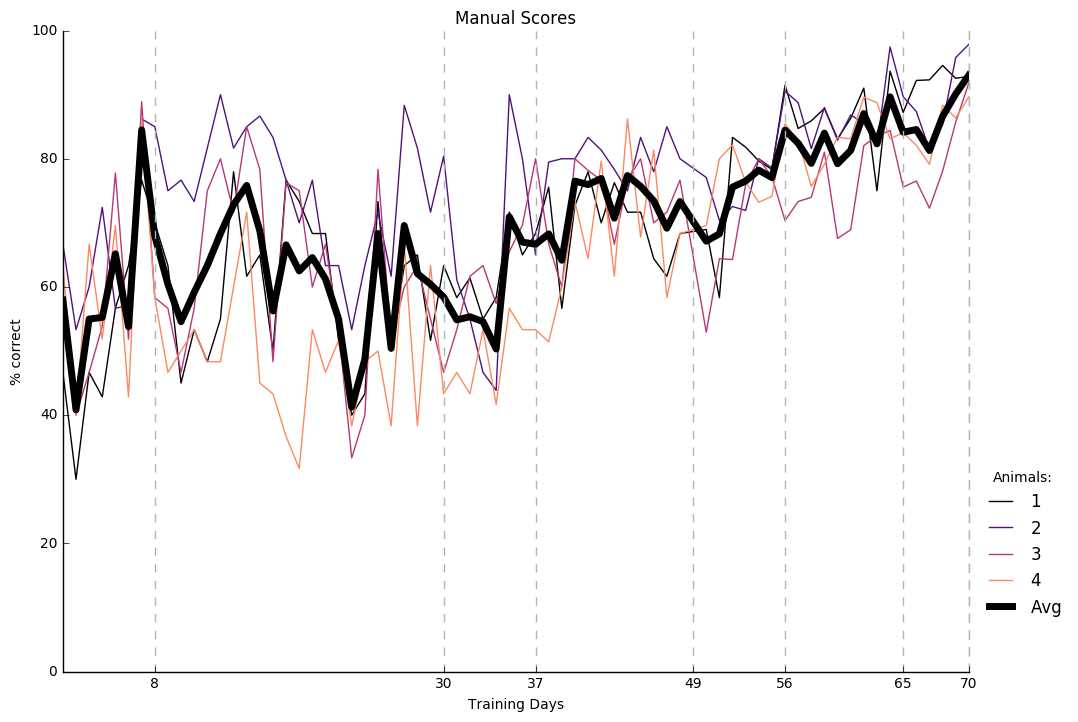

In [56]:
plotIt(manualScores, title = "Manual Scores", ylabel = "% correct", Phase = False, Norm = False, ylim = [0,100])

### Rolling Mean

In [18]:
manualScores.rolling(5).mean()

1          2          3          4
Phase Day                                            
1     1          NaN        NaN        NaN        NaN
      2          NaN        NaN        NaN        NaN
      3          NaN        NaN        NaN        NaN
      4          NaN        NaN        NaN        NaN
      5    44.571429  61.816092  54.692602  58.283414
      6    47.904762  59.911330  54.028490  54.188176
      7    57.238095  66.486043  63.806268  63.429555
2     1    61.904762  71.486043  66.139601  61.762888
      2    66.000000  72.003284  66.703704  60.725851
      3    63.666667  76.003284  60.481481  56.812808
      4    61.666667  79.241379  61.444444  58.908046
      5    56.000000  78.333333  58.666667  51.333333
      6    53.000000  79.333333  63.000000  49.333333
      7    55.926554  80.666667  66.000000  52.000000
      8    59.259887  82.333333  73.666667  56.333333
      9    61.593220  85.000000  78.000000  54.666667
      10   61.926554  85.333333  72.666667  53.666667
      11   66.259887  82.666667  71.920904  51.333333
      12   65.333333  80.333333  72.587571  45.666667
      13   66.666667  78.666667  67.587571  42.000000
      14   67.333333  74.000000  65.254237  42.333333
      15   67.666667  70.000000  66.254237  44.000000
      16   60.333333  65.333333  57.666667  44.333333
      17   54.333333  64.000000  50.666667  47.666667
      18   55.333333  63.000000  54.333333  47.000000
      19   51.666667  62.666667  51.333333  45.333333
      20   54.000000  67.666667  52.666667  48.333333
      21   59.000000  73.333333  58.666667  48.333333
      22   60.666667  75.000000  61.666667  51.333333
3     1    58.666667  76.745098  55.333333  50.000000
...              ...        ...        ...        ...
4     5    70.249786  77.564103  72.969697  60.500404
      6    70.583119  80.835289  72.303030  65.765940
      7    70.726246  80.604520  72.303030  67.813559
      8    73.726246  79.604520  75.636364  73.054939
      9    73.514124  80.271186  75.636364  71.947594
      10   70.802260  79.197740  74.000000  75.337425
      11   69.135593  79.926554  73.000000  71.071888
      12   67.548023  80.259887  75.000000  72.405221
5     1    66.944574  80.968220  72.627451  68.953697
      2    66.404344  79.718220  67.215686  69.307418
      3    65.189655  78.199074  66.097042  69.036232
      4    69.522989  75.708878  64.620852  73.798137
      5    72.219958  74.094843  64.487518  75.404197
      6    74.422277  74.386510  67.526734  76.257199
      7    76.295840  74.684129  72.377095  77.171742
6     1    82.927045  78.723262  73.569813  78.262651
      2    83.204823  81.963458  75.379337  78.413027
      3    84.024285  83.893283  74.973858  78.275435
      4    85.659650  85.493283  75.176389  79.465911
      5    86.616360  86.357944  73.251306  81.304992
      6    85.578761  85.613158  72.961016  80.837459
      7    86.839445  84.968421  74.704606  82.180590
      8    84.656346  85.041520  76.626503  84.795455
      9    85.822956  86.928700  77.307089  85.585498
7     1    86.646388  88.287897  78.909854  85.727342
      2    87.830558  88.393160  80.432193  85.525018
      3    88.086969  87.566967  78.479768  83.427116
      4    92.000012  88.256729  77.373106  83.351534
      5    91.776473  87.927445  77.632846  84.000885
      6    92.901093  89.559193  80.883914  85.123409

[70 rows x 4 columns]

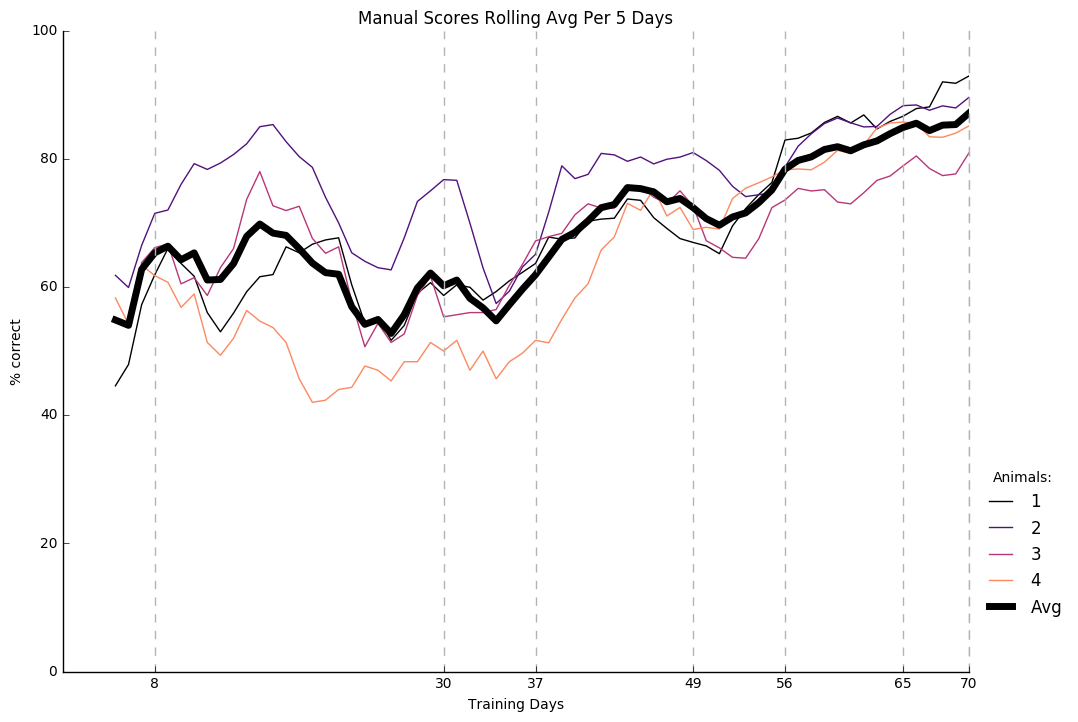

In [55]:
plotIt(manualScores.rolling(5).mean(), title = "Manual Scores Rolling Avg Per 5 Days", ylabel = "% correct", Phase = False, Norm = False, ylim = [0,100])

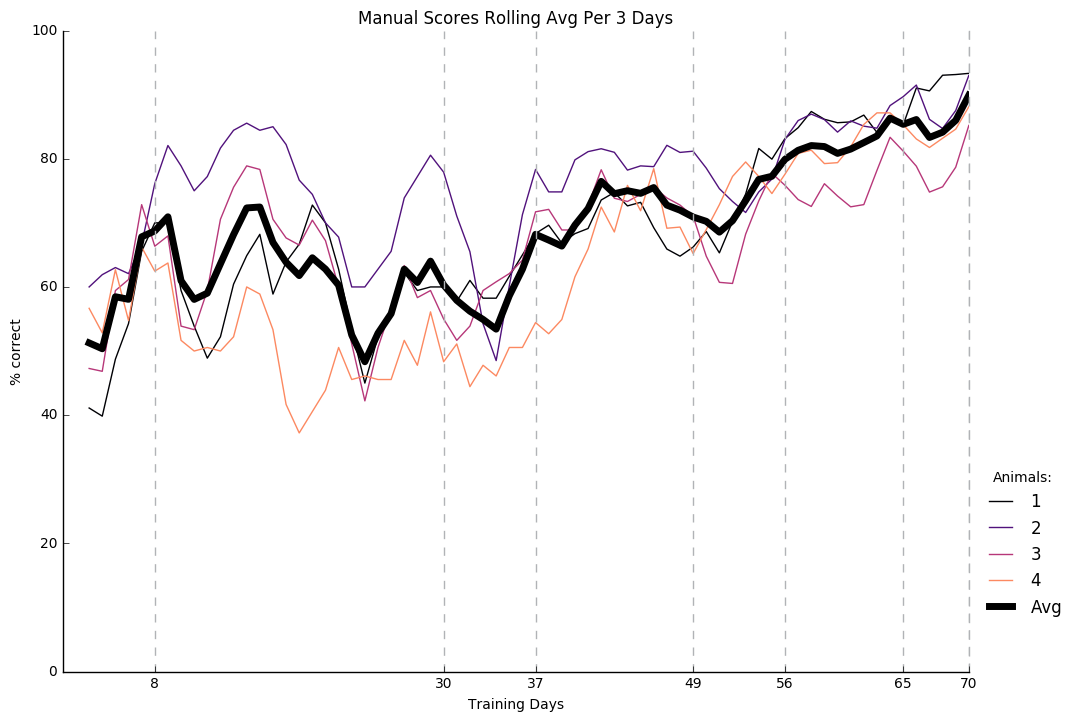

In [54]:
plotIt(manualScores.rolling(3).mean(), title = "Manual Scores Rolling Avg Per 3 Days", ylabel = "% correct", Phase = False, Norm = False, ylim = [0,100])

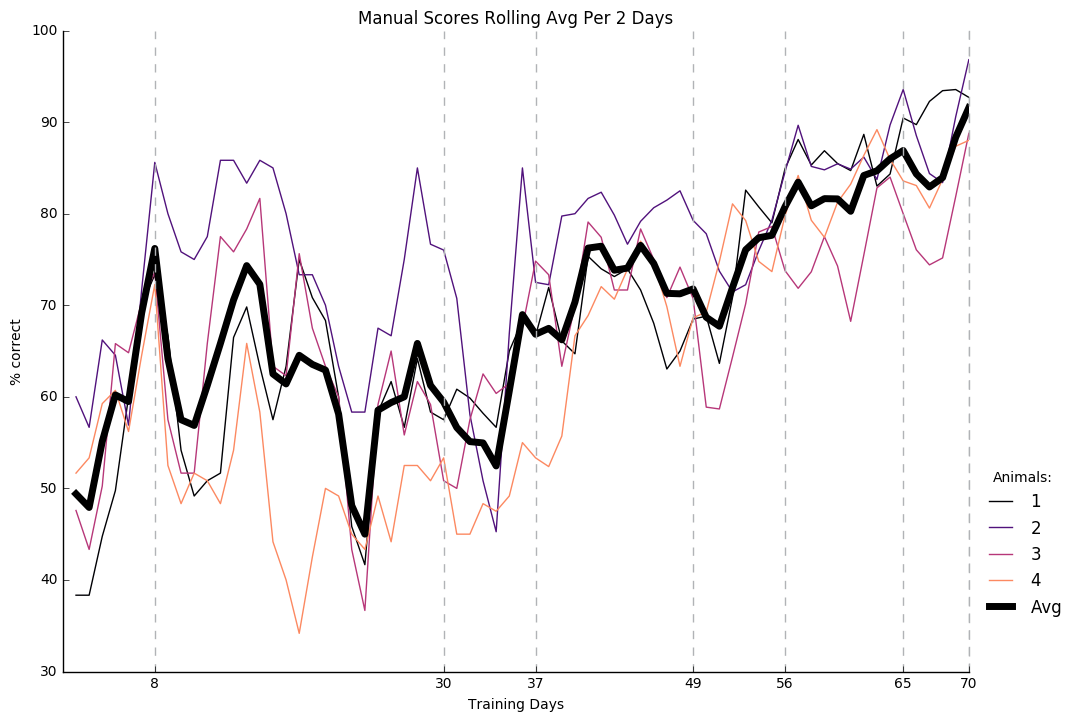

In [17]:
plotIt(manualScores.rolling(2).mean(), title = "Manual Scores Rolling Avg Per 2 Days", ylabel = "% correct", Phase = False, Norm = False)

In [8]:
manualScores.groupby(level='Phase').mean().mean(axis=1)

Phase
1    58.927579
2    61.733757
3    58.785736
4    72.356397
5    73.290841
6    83.304492
7    86.620282
dtype: float64

## Scoring based on rewards given (threshold varies per phase)

I'll compare the different thresholds for amount of treats given to count as a correct trial, and the phase in which the threshold was valid. 

** When the threshold for a correct trial consists of > 3 rewards (additional reward + sensor triggered reward) for phase 1, and >2 rewards for all phases after that.  **

In [5]:
Scores = scorePerPhase(Adat,Mdat,  {'r': 3, 'p': 1})

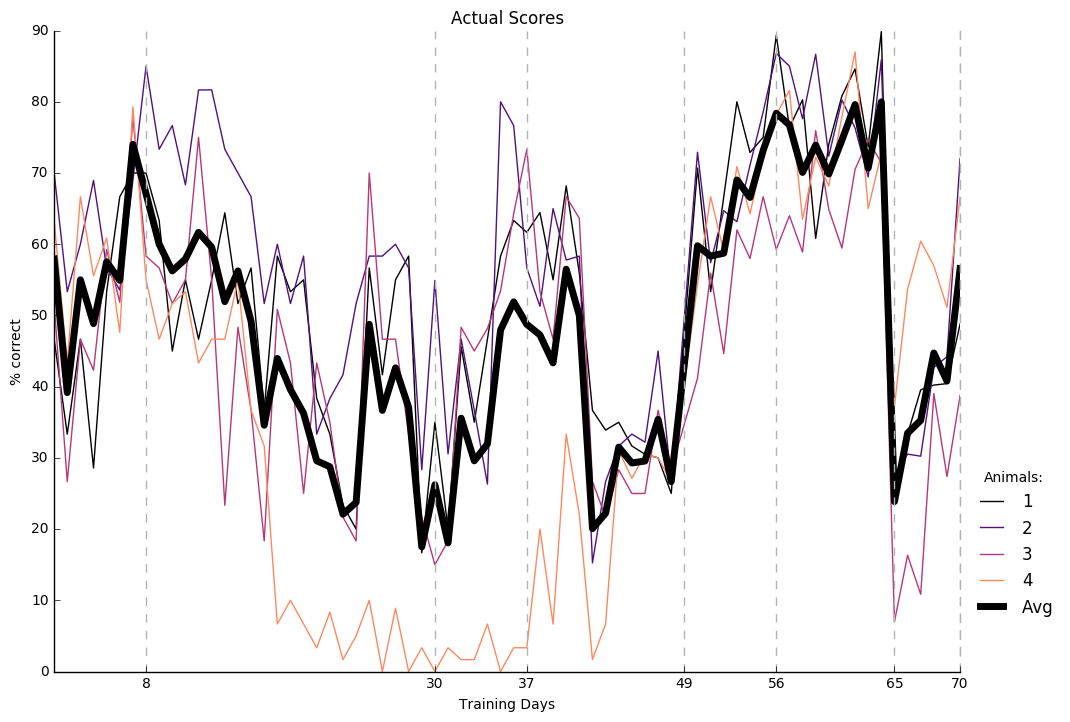

In [6]:
plotIt(Scores, title = "Actual Scores", ylabel = "% correct", Phase = False, Norm = False)

** When the threshold for a correct trial consists of > 2 awards for phase 1, and > 1 award for phases after that.**

*This is fairly accurate of the actual situations since in the first phase often 3 or more treats were given for a correct trial, but this changed to 2 in phase 2 and beyond.* 

In [6]:
rewardScores = scorePerPhase(Adat,Mdat,  {'r': 2, 'p': 1})

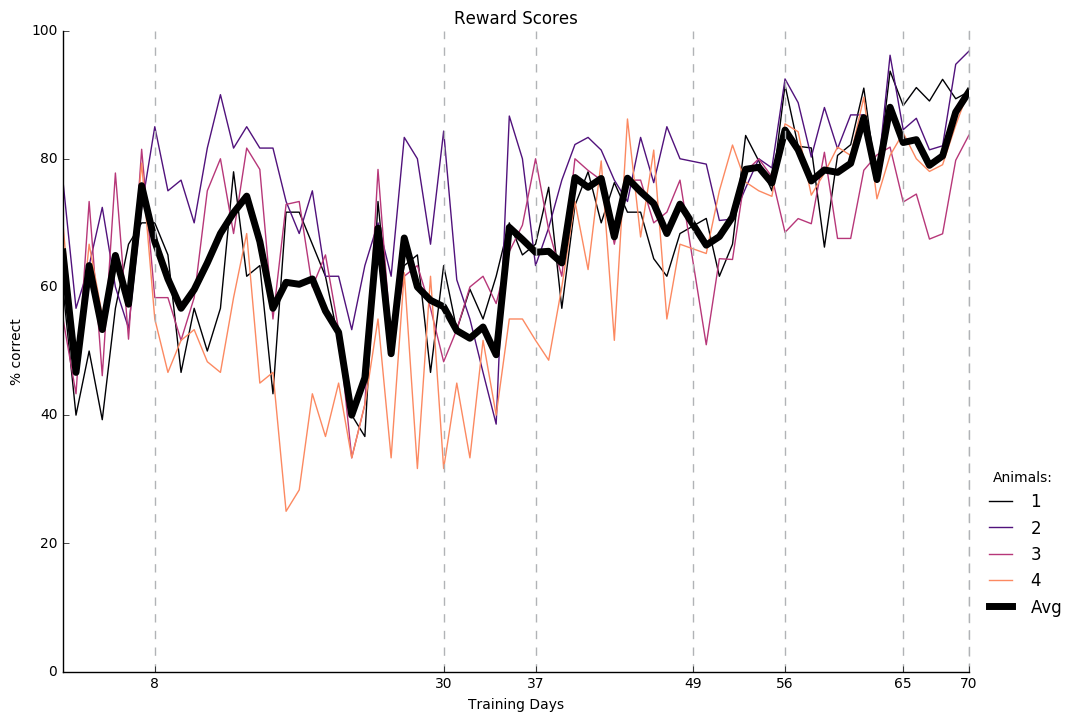

In [53]:
plotIt(rewardScores, title = "Reward Scores", ylabel = "% correct", Phase = False, Norm = False, ylim = [0,100])

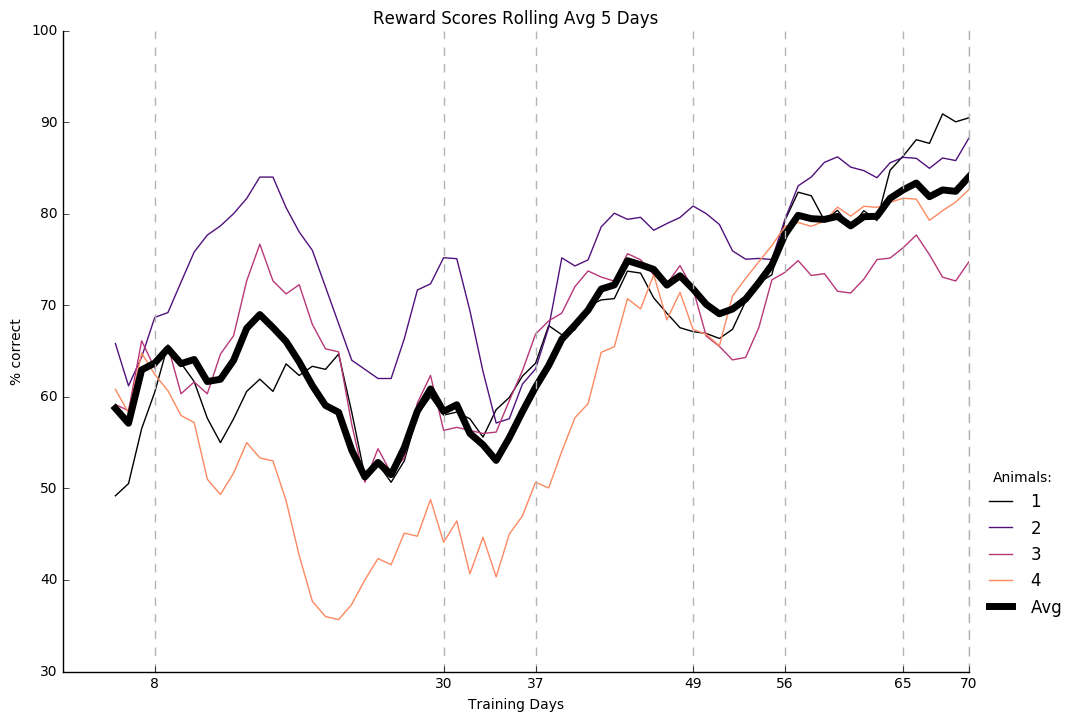

In [25]:
plotIt(rewardScores.rolling(5).mean(), title = "Reward Scores Rolling Avg 5 Days", ylabel = "% correct", Phase = False, Norm = False)

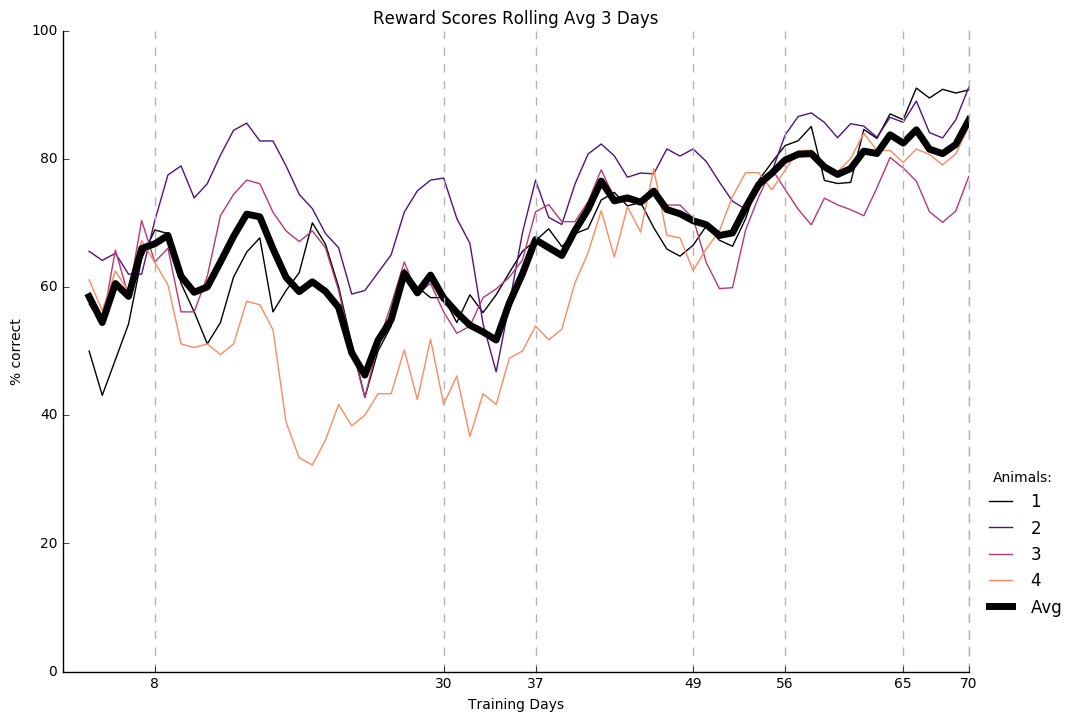

In [52]:
plotIt(rewardScores.rolling(3).mean(), title = "Reward Scores Rolling Avg 3 Days", ylabel = "% correct", Phase = False, Norm = False, ylim = [0,100])

** Same as above but this time the reward threshold was > 2 for phases 1 and 2, and >1 for the remaining phases **

In [11]:
Scores = scorePerPhase(Adat,Mdat,  {'r': 2, 'p': 2})

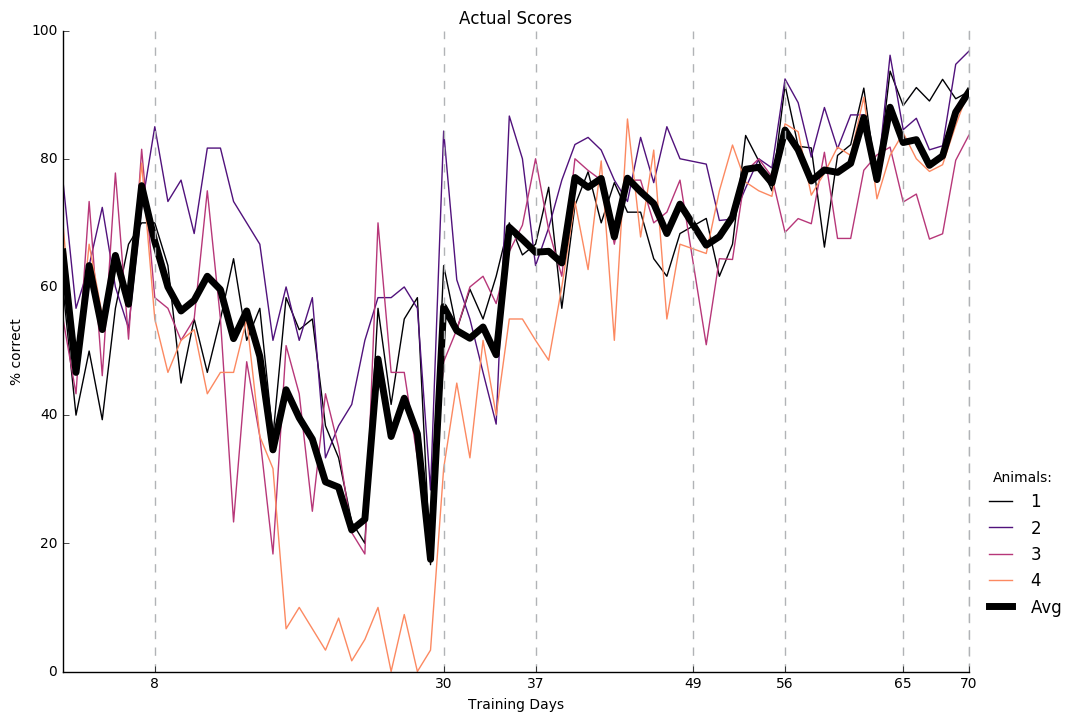

In [12]:
plotIt(Scores, title = "Actual Scores", ylabel = "% correct", Phase = False, Norm = False)

** Same as above but this time the threshold was > 2 for phases 1,2, and 3 and >1 for the remaining phases **

In [13]:
Scores = scorePerPhase(Adat,Mdat,  {'r': 2, 'p': 3})

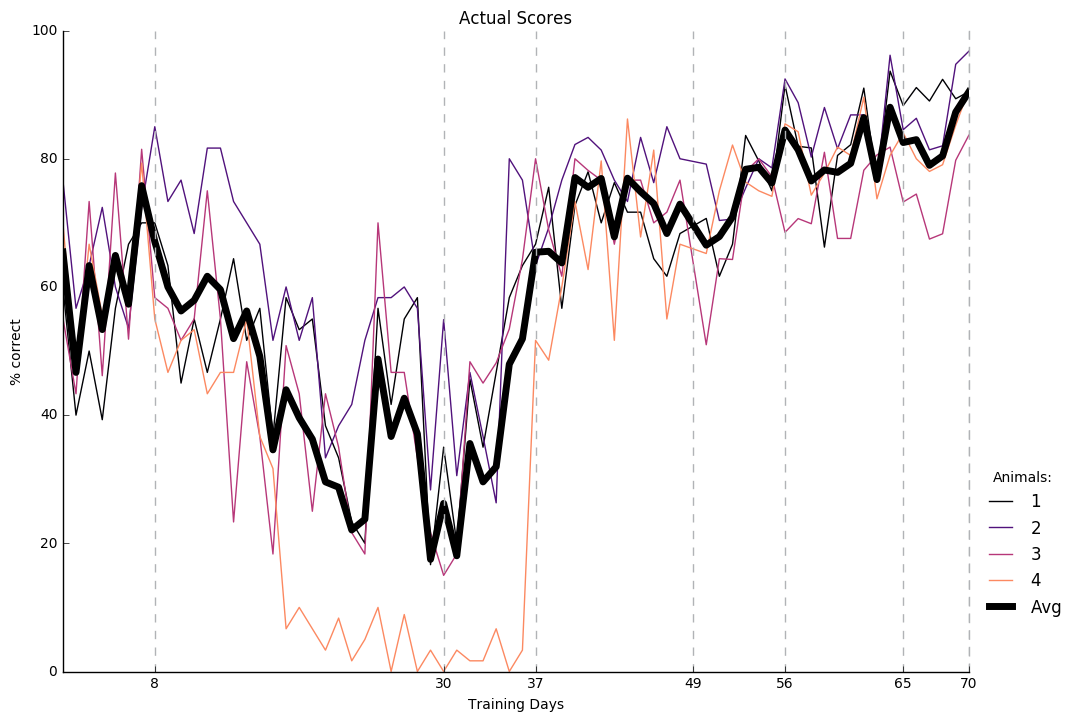

In [14]:
plotIt(Scores, title = "Actual Scores", ylabel = "% correct", Phase = False, Norm = False)

** Same as above but this time the threshold was > 2 for phases 1,2, 3 and 4 and >1 for the remaining phases **

In [15]:
Scores = scorePerPhase(Adat,Mdat,  {'r': 2, 'p': 4})

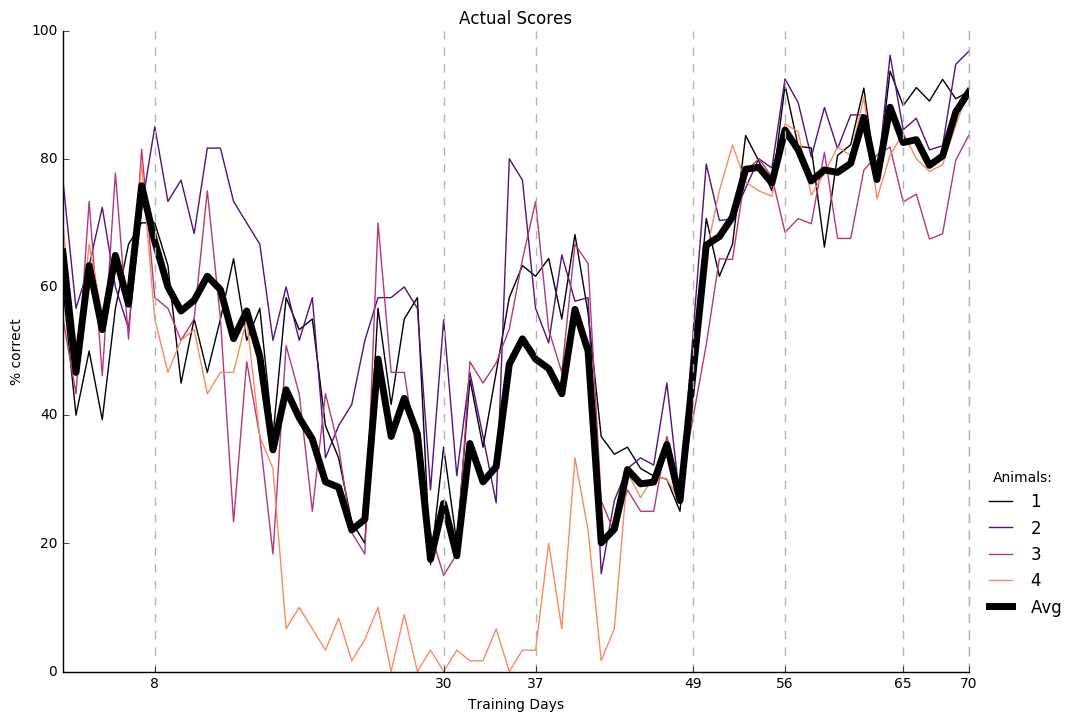

In [16]:
plotIt(Scores, title = "Actual Scores", ylabel = "% correct", Phase = False, Norm = False)

** When the threshold for a correct trial consists of > 3 rewards (additional reward + sensor triggered reward) for phase 1 and 2, and >2 rewards for all phases after that. ** 

In [17]:
Scores = scorePerPhase(Adat,Mdat,  {'r': 3, 'p': 2})

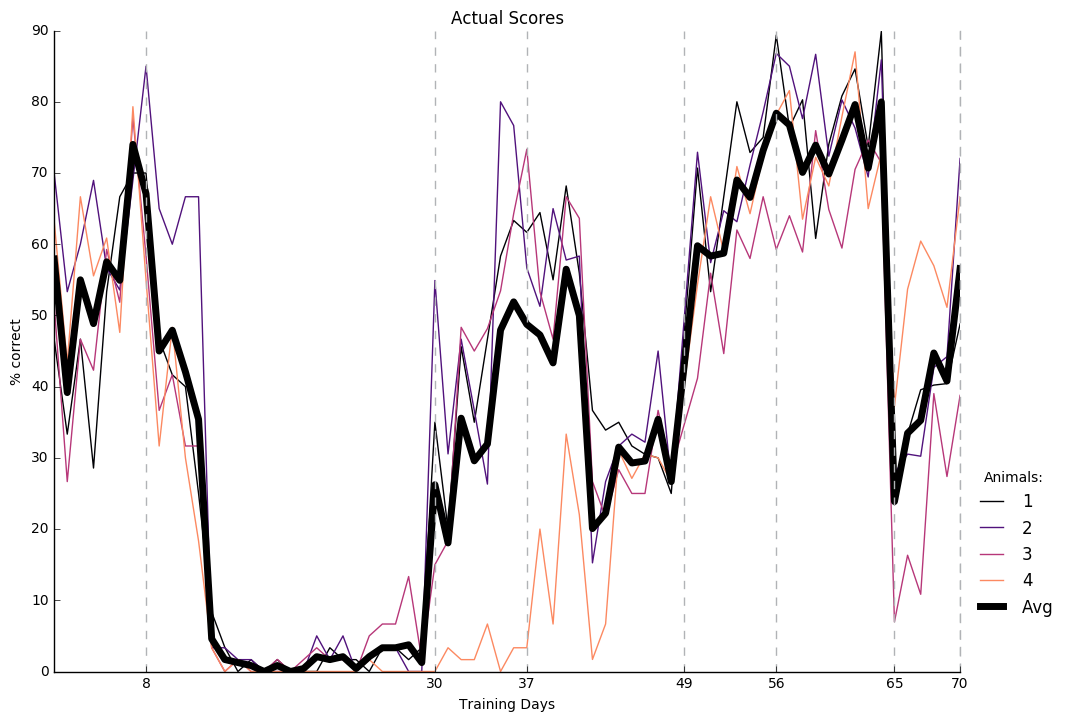

In [18]:
plotIt(Scores, title = "Actual Scores", ylabel = "% correct", Phase = False, Norm = False)

** When the threshold for a correct trial consists of > 3 rewards (additional reward + sensor triggered reward) for phase 1,2 and 3, and >2 rewards for all phases after that.**  

In [19]:
Scores = scorePerPhase(Adat,Mdat,  {'r': 3, 'p': 3})

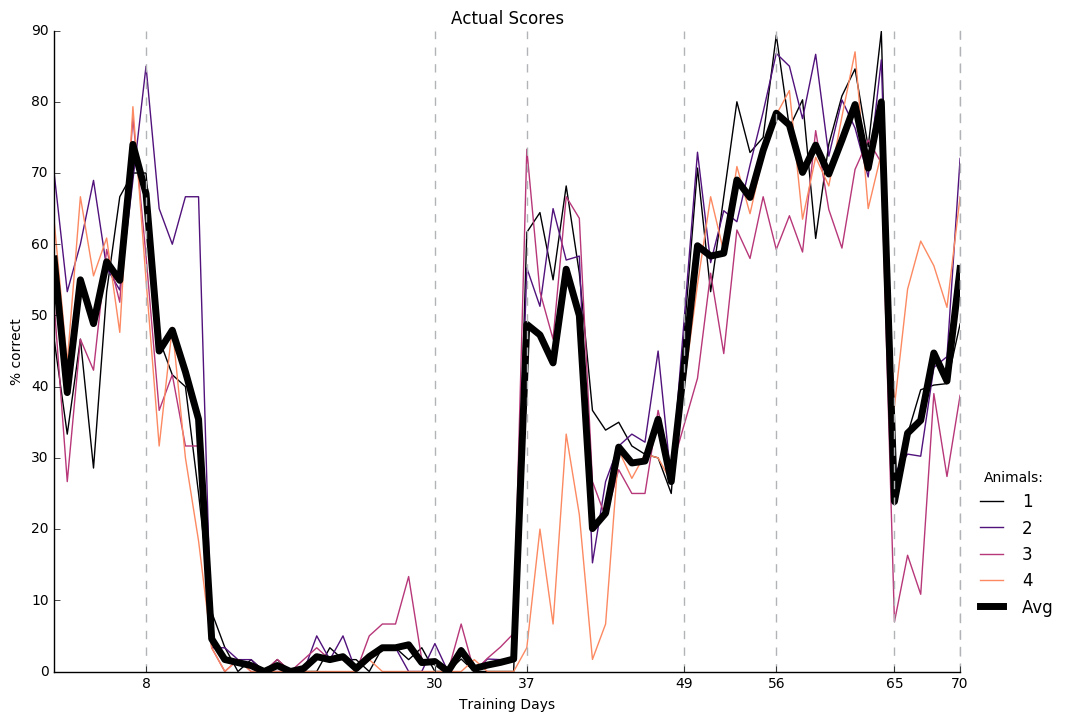

In [20]:
plotIt(Scores, title = "Actual Scores", ylabel = "% correct", Phase = False, Norm = False)

## Scoring based on sensors

In the first two phases in particular (to some degree still in phase 3 and 4 as well) the sensors did not always pick up a correct choice reliably. Often the rat's tail or body would activate the sensors while the rat was still at the nose poke, or when it started turning towards one of the areas. In these phases the researcher watched the rat carefully and rewarded based on his movement in the correct direction, regardless of sensor readings. 

In [8]:
choices,sides = preProcessChoices(Adat,Mdat)

In [9]:
correct, incorrect, nTotalTrials  = scoreChoicesUnfiltered(choices, sides)

In [10]:
sensorScores = calcScoresPerDay(correct, nTotalTrials)

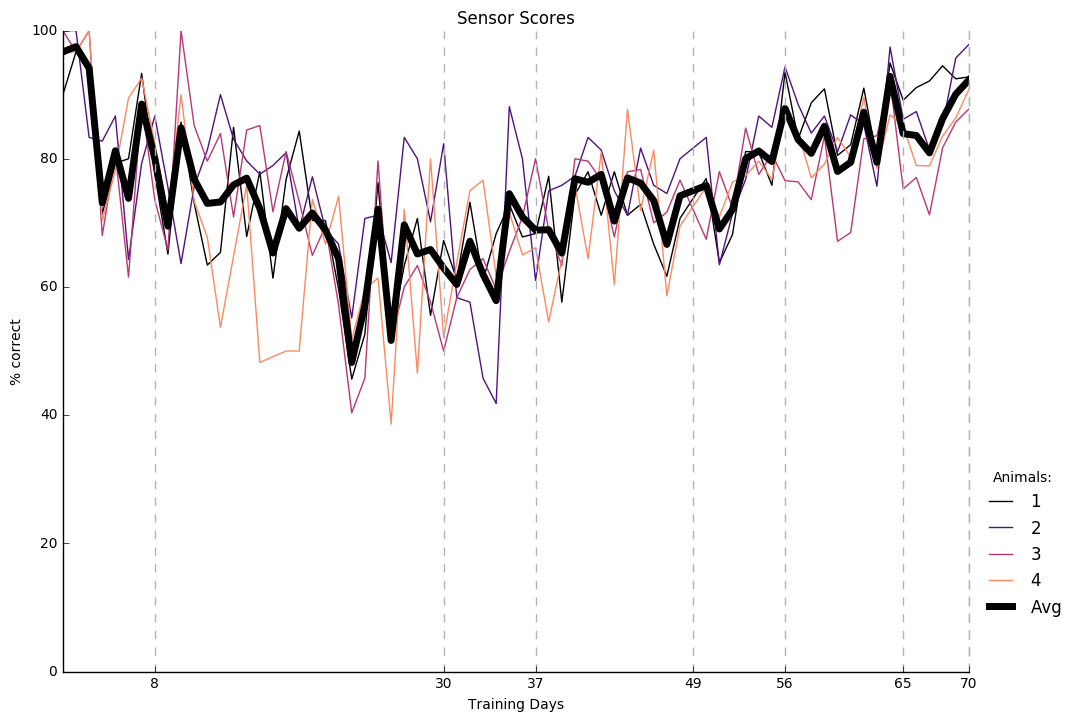

In [51]:
plotIt(sensorScores, title = "Sensor Scores", ylabel = "% correct", Phase = False, Norm = False, ylim = [0,100])

### running avg

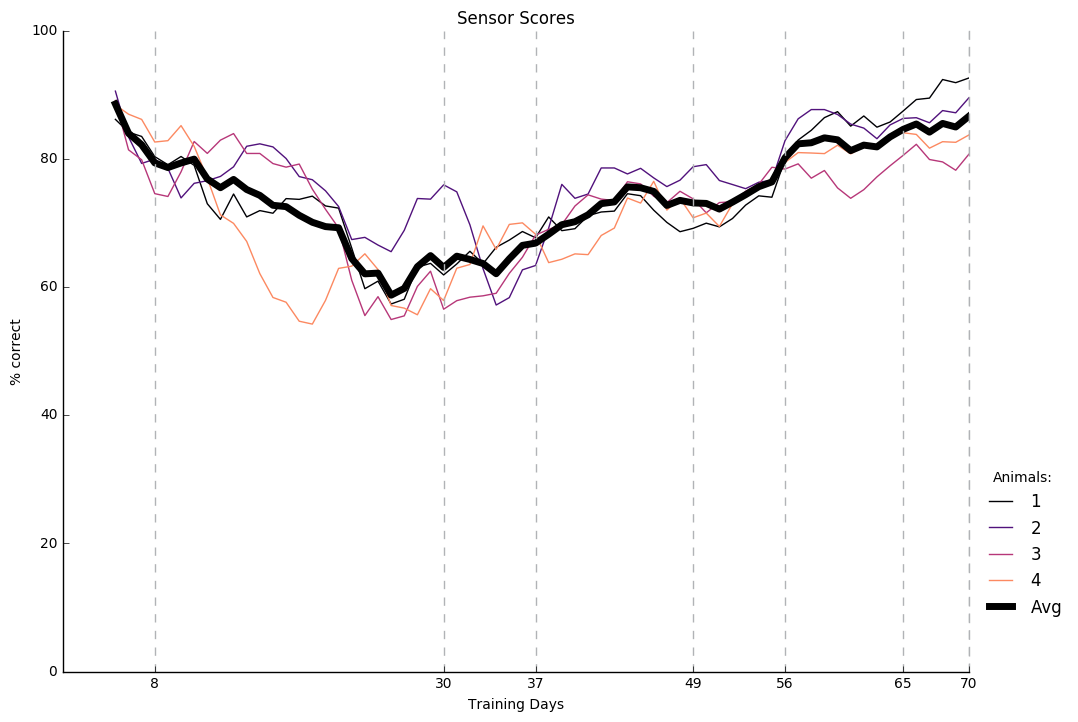

In [50]:
plotIt(sensorScores.rolling(5).mean(), title = "Sensor Scores", ylabel = "% correct", Phase = False, Norm = False, ylim = [0,100])

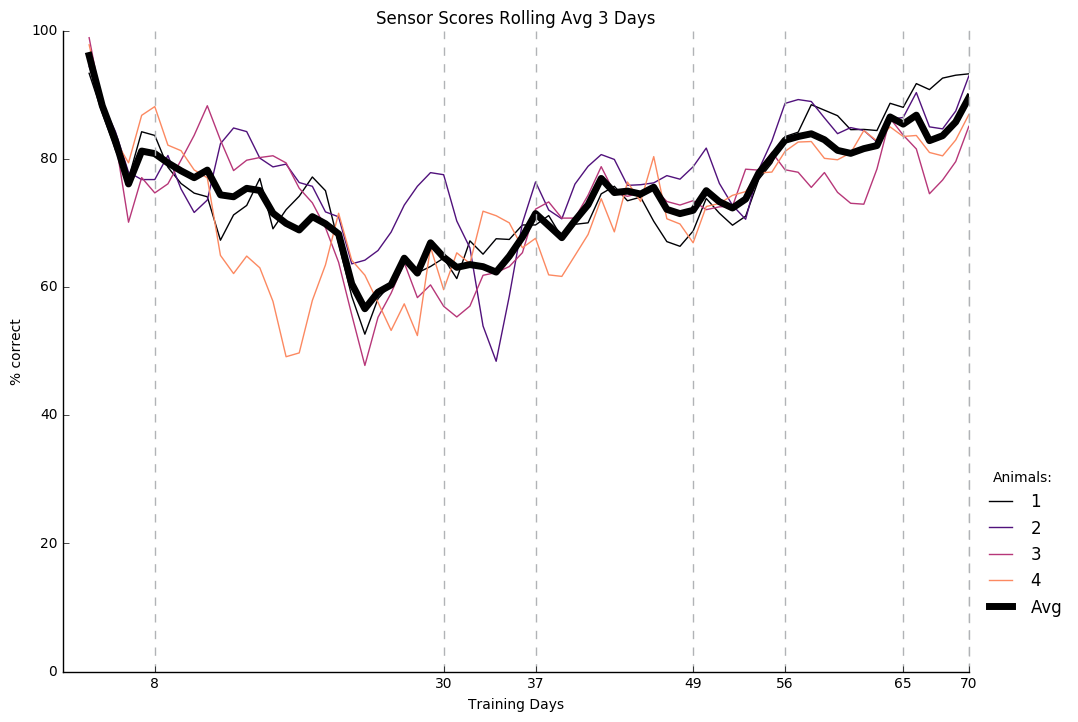

In [49]:
plotIt(sensorScores.rolling(3).mean(), title = "Sensor Scores Rolling Avg 3 Days", ylabel = "% correct", Phase = False, Norm = False, ylim = [0,100])

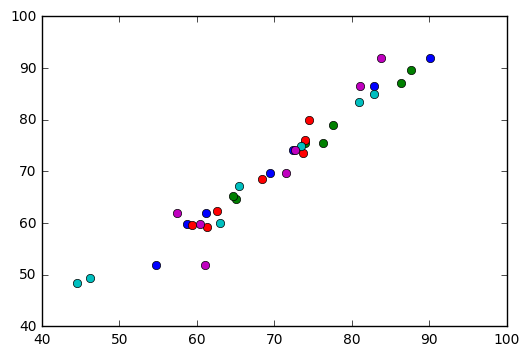

In [16]:
plt.plot(rewardScores.groupby(level = "Phase").mean(),manualScores.groupby(level = "Phase").mean(), marker='o', linestyle='', ms=6)

In [11]:
def compareScoringMethodsScatter(method1,method2, method1name = "RewardScores", method2name = "ManualScores", phases = range(5,8)):    

    f, ax = plt.subplots()    
    #ax = axs.ravel()
    
    for phase in phases:
        

        ax.plot(method1.loc[phase].mean(),method2.loc[phase].mean(), marker='o', linestyle='', ms=6, label= "Phase " + str(phase))
 
       
        ax.legend(numpoints = 1, loc = 4, fontsize = 9)
        ax.set(xlim=(0,100), ylim=(0,100))
        ax.set_xlabel("% of correct trials " + method1name)
        ax.set_ylabel("% of correct trials " + method2name)
        ax.set(adjustable='box-forced', aspect='equal')
        
        title = method1name + " Plotted Against " + method2name
        ax.set_title(title)
        
        ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

    plt.savefig(title + ".png",format = "png")
    plt.savefig(title + ".eps",format = "eps")

### Reward Scores Compared With Manual Scores

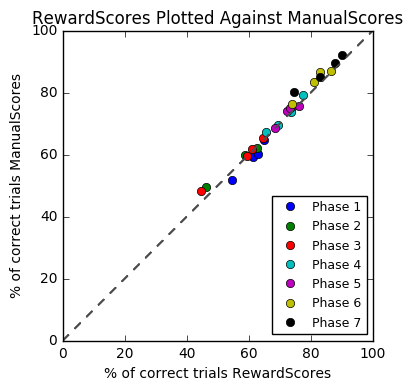

In [16]:
compareScoringMethodsScatter(rewardScores.ix[:,:],manualScores, method1name = "RewardScores", method2name = "ManualScores", phases = range(1,8))

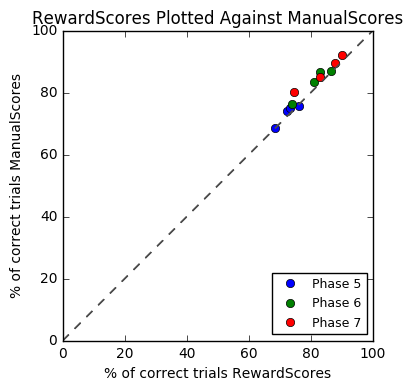

In [13]:
compareScoringMethodsScatter(rewardScores.ix[5:7,:],manualScores, method1name = "RewardScores", method2name = "ManualScores")

In [28]:
rewardScores.ix[:,0:4]

Animal             1          2          3          4
Phase Day                                            
1     1    60.000000  76.666667  55.172414  70.000000
      2    40.000000  56.666667  43.333333  46.666667
      3    50.000000  63.333333  73.333333  66.666667
      4    39.285714  72.413793  46.153846  55.555556
      5    56.666667  60.000000  77.777778  65.217391
      6    66.666667  53.571429  51.851852  57.142857
      7    70.000000  72.413793  81.481481  79.310345
2     1    70.000000  85.000000  58.333333  55.000000
      2    65.000000  75.000000  58.333333  46.666667
      3    46.666667  76.666667  51.666667  51.666667
      4    56.666667  70.000000  58.333333  53.333333
      5    50.000000  81.666667  75.000000  48.333333
      6    56.666667  90.000000  80.000000  46.666667
      7    77.966102  81.666667  68.333333  58.333333
      8    61.666667  85.000000  81.666667  68.333333
      9    63.333333  81.666667  78.333333  45.000000
      10   43.333333  81.666667  55.000000  46.666667
      11   71.666667  73.333333  72.881356  25.000000
      12   71.666667  68.333333  73.333333  28.333333
      13   66.666667  75.000000  60.000000  43.333333
      14   61.666667  61.666667  65.000000  36.666667
      15   51.666667  61.666667  53.333333  45.000000
      16   40.000000  53.333333  33.333333  33.333333
      17   36.666667  63.333333  41.666667  41.666667
      18   73.333333  70.000000  78.333333  55.000000
      19   51.666667  61.666667  51.666667  33.333333
      20   63.333333  83.333333  61.666667  62.222222
      21   65.000000  80.000000  63.333333  31.666667
      22   46.666667  66.666667  56.666667  61.666667
3     1    63.333333  84.313725  48.333333  31.666667
...              ...        ...        ...        ...
4     5    77.966102  83.333333  78.181818  62.711864
      6    70.000000  81.355932  76.666667  79.661017
      7    76.271186  76.666667  66.666667  51.666667
      8    71.666667  73.333333  76.666667  86.206897
      9    71.666667  83.333333  76.666667  67.796610
      10   64.406780  76.271186  70.000000  81.355932
      11   61.666667  85.000000  71.666667  55.000000
      12   68.333333  80.000000  76.666667  66.666667
5     1    69.511494  79.583333  63.823529  65.942029
      2    70.689655  79.166667  50.980392  65.217391
      3    61.666667  70.370370  64.406780  75.000000
      4    66.666667  70.588235  64.285714  82.142857
      5    83.636364  75.438596  78.000000  76.363636
      6    79.661017  80.000000  80.000000  75.000000
      7    75.000000  78.571429  77.192982  74.137931
6     1    91.489362  92.452830  68.518519  85.454545
      2    81.944444  88.750000  70.666667  84.210526
      3    81.690141  80.263158  69.863014  74.324324
      4    66.216216  88.000000  81.012658  77.777778
      5    80.519481  81.578947  67.567568  81.818182
      6    82.191781  86.842105  67.567568  80.519481
      7    91.025641  86.842105  78.205128  89.610390
      8    76.315789  76.388889  80.597015  73.750000
      9    93.670886  96.153846  81.818182  80.519481
7     1    88.297872  84.536082  73.255814  84.042553
      2    91.111111  86.315789  74.489796  80.000000
      3    89.010989  81.395349  67.469880  78.021978
      4    92.391304  82.022472  68.292683  79.069767
      5    89.361702  94.736842  79.761905  85.227273
      6    90.476190  96.774194  83.673469  90.804598

[70 rows x 4 columns]

In [23]:
manualScores

1          2          3          4
Phase Day                                            
1     1    46.666667  66.666667  55.172414  63.333333
      2    30.000000  53.333333  40.000000  40.000000
      3    46.666667  60.000000  46.666667  66.666667
      4    42.857143  72.413793  53.846154  51.851852
      5    56.666667  56.666667  77.777778  69.565217
      6    63.333333  57.142857  51.851852  42.857143
      7    76.666667  86.206897  88.888889  86.206897
2     1    70.000000  85.000000  58.333333  58.333333
      2    63.333333  75.000000  56.666667  46.666667
      3    45.000000  76.666667  46.666667  50.000000
      4    53.333333  73.333333  56.666667  53.333333
      5    48.333333  81.666667  75.000000  48.333333
      6    55.000000  90.000000  80.000000  48.333333
      7    77.966102  81.666667  71.666667  60.000000
      8    61.666667  85.000000  85.000000  71.666667
      9    65.000000  86.666667  78.333333  45.000000
      10   50.000000  83.333333  48.333333  43.333333
      11   76.666667  76.666667  76.271186  36.666667
      12   73.333333  70.000000  75.000000  31.666667
      13   68.333333  76.666667  60.000000  53.333333
      14   68.333333  63.333333  66.666667  46.666667
      15   51.666667  63.333333  53.333333  51.666667
      16   40.000000  53.333333  33.333333  38.333333
      17   43.333333  63.333333  40.000000  48.333333
      18   73.333333  71.666667  78.333333  50.000000
      19   50.000000  61.666667  51.666667  38.333333
      20   63.333333  88.333333  60.000000  66.666667
      21   65.000000  81.666667  63.333333  38.333333
      22   51.666667  71.666667  55.000000  63.333333
3     1    63.333333  80.392157  46.666667  43.333333
...              ...        ...        ...        ...
4     5    77.966102  83.333333  78.181818  64.406780
      6    70.000000  81.355932  76.666667  79.661017
      7    76.271186  78.333333  66.666667  61.666667
      8    71.666667  75.000000  76.666667  86.206897
      9    71.666667  83.333333  80.000000  67.796610
      10   64.406780  77.966102  70.000000  81.355932
      11   61.666667  85.000000  71.666667  58.333333
      12   68.333333  80.000000  76.666667  68.333333
5     1    68.649425  78.541667  64.803922  68.949275
      2    68.965517  77.083333  52.941176  69.565217
      3    58.333333  70.370370  64.406780  80.000000
      4    83.333333  72.549020  64.285714  82.142857
      5    81.818182  71.929825  76.000000  76.363636
      6    79.661017  80.000000  80.000000  73.214286
      7    78.333333  78.571429  77.192982  74.137931
6     1    91.489362  90.566038  70.370370  85.454545
      2    84.722222  88.750000  73.333333  82.894737
      3    85.915493  81.578947  73.972603  75.675676
      4    87.837838  88.000000  81.012658  79.166667
      5    83.116883  82.894737  67.567568  83.333333
      6    86.301370  86.842105  68.918919  83.116883
      7    91.025641  85.526316  82.051282  89.610390
      8    75.000000  81.944444  83.582090  88.750000
      9    93.670886  97.435897  84.415584  83.116883
7     1    87.234043  89.690722  75.581395  84.042553
      2    92.222222  87.368421  76.530612  82.105263
      3    92.307692  81.395349  72.289157  79.120879
      4    94.565217  85.393258  78.048780  88.372093
      5    92.553191  95.789474  85.714286  86.363636
      6    92.857143  97.849462  91.836735  89.655172

[70 rows x 4 columns]

### Sensor Scores Compared to Manual Scores

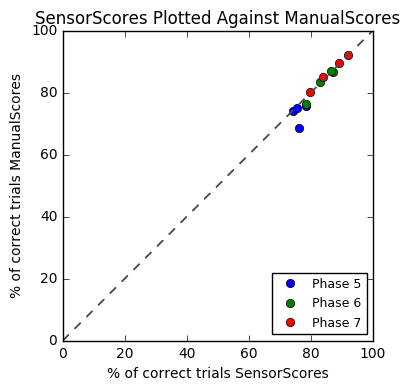

In [14]:
compareScoringMethodsScatter(sensorScores.ix[5:7,:],manualScores, method1name = "SensorScores", method2name = "ManualScores")

### Sensor Scores Against Reward Scores

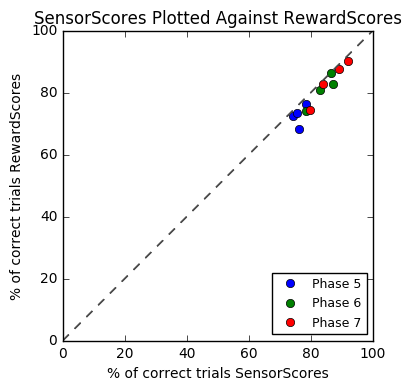

In [15]:
compareScoringMethodsScatter(sensorScores.ix[5:7,:],rewardScores.ix[5:7,:], method1name = "SensorScores", method2name = "RewardScores")

## Seperate Cue Training and Full Task Performance

### Cue Training

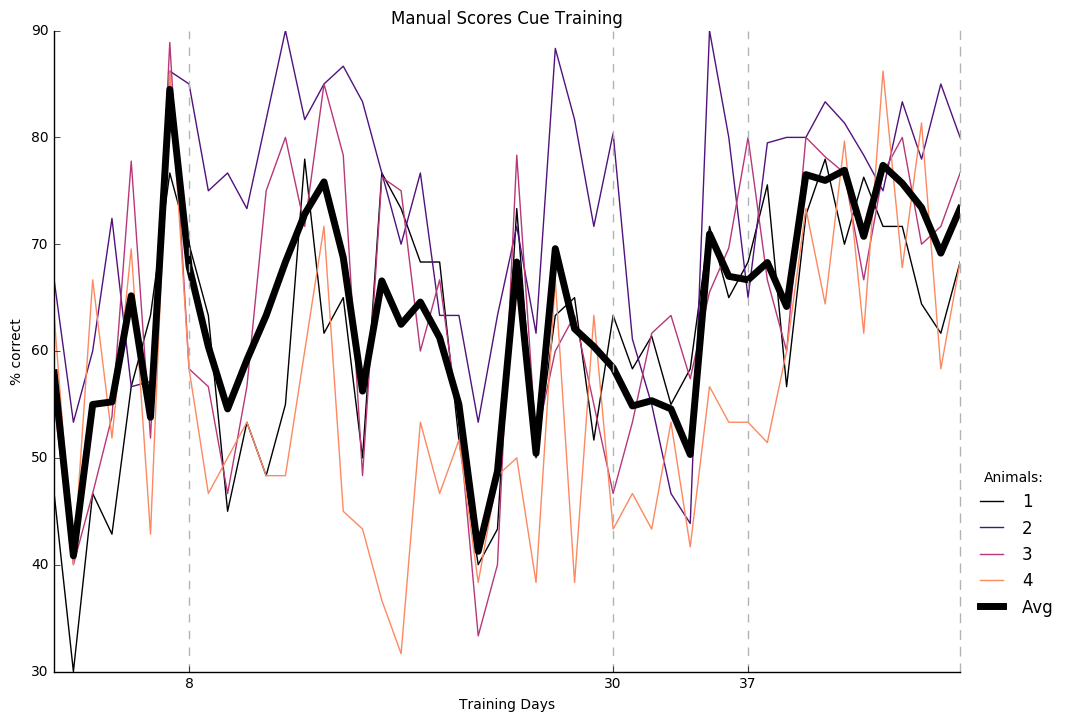

In [36]:
plotIt(manualScores.ix[1:4,:], title = "Manual Scores Cue Training", ylabel = "% correct", Phase = False, Norm = False)

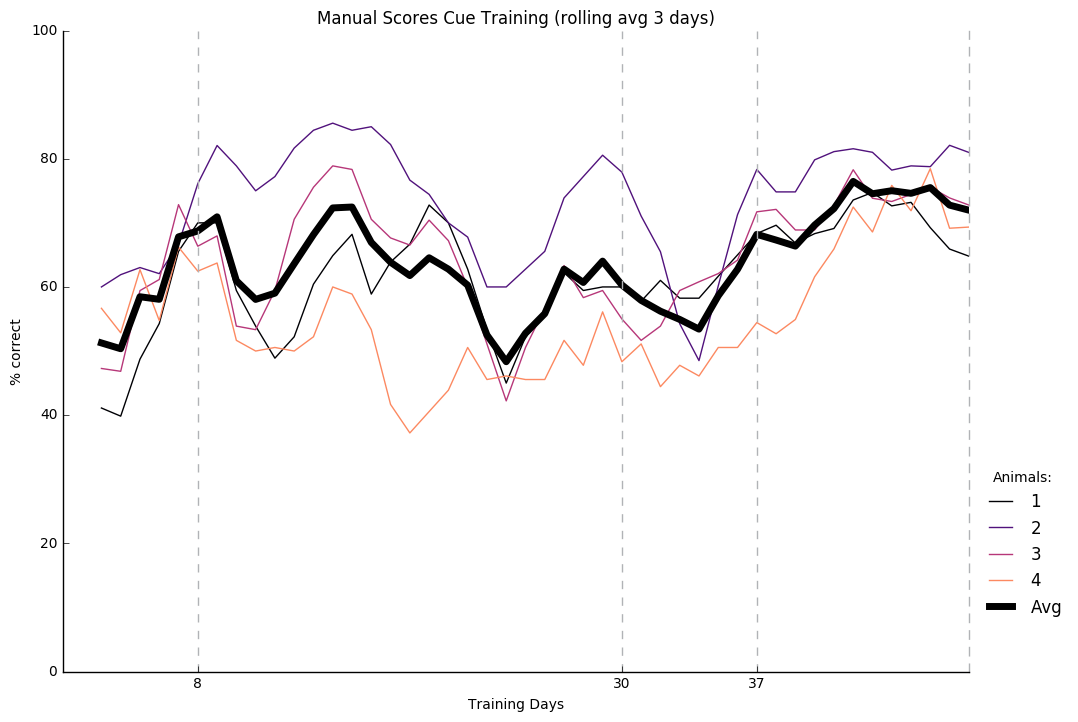

In [34]:
plotIt(manualScores.ix[1:4,:].rolling(3).mean(), title = "Manual Scores Cue Training (rolling avg 3 days)", ylabel = "% correct", Phase = False, Norm = False, ylim = [0,100])

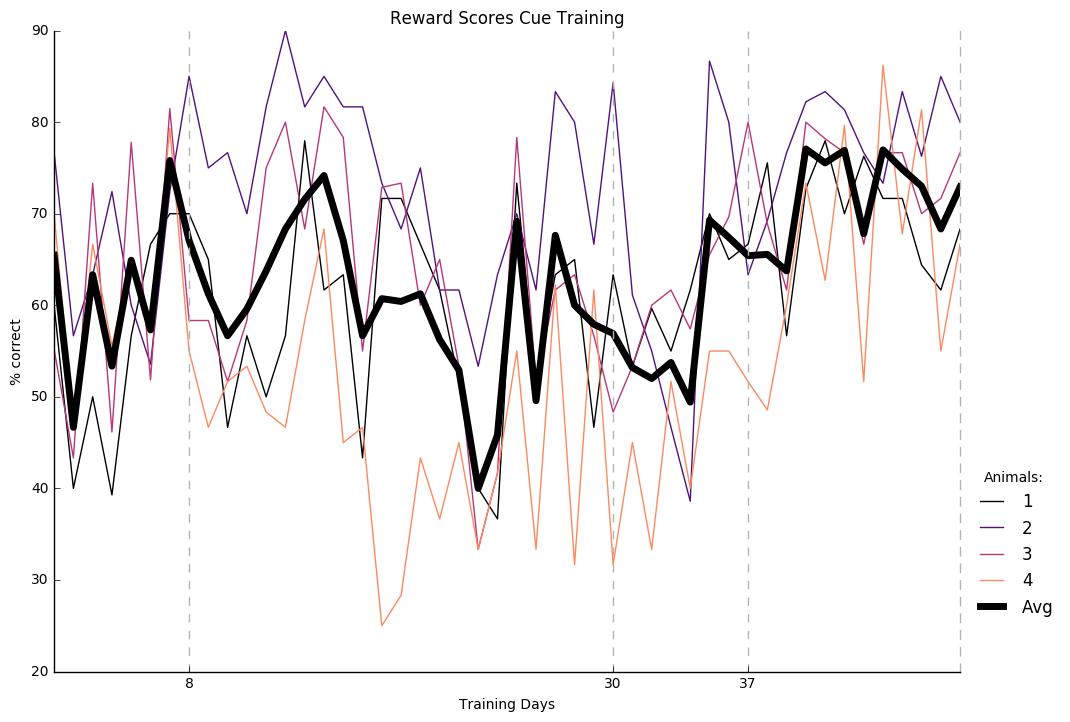

In [37]:
plotIt(rewardScores.ix[1:4,:], title = "Reward Scores Cue Training", ylabel = "% correct", Phase = False, Norm = False)

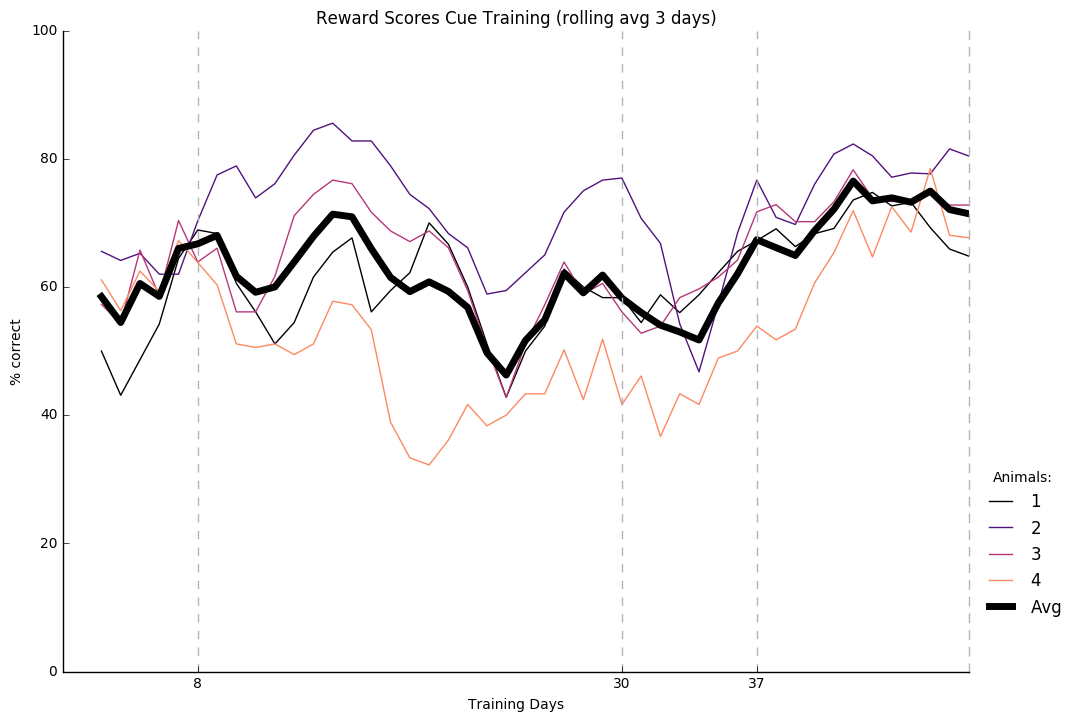

In [38]:
plotIt(rewardScores.ix[1:4,:].rolling(3).mean(), title = "Reward Scores Cue Training (rolling avg 3 days)", ylabel = "% correct", Phase = False, Norm = False, ylim = [0,100])

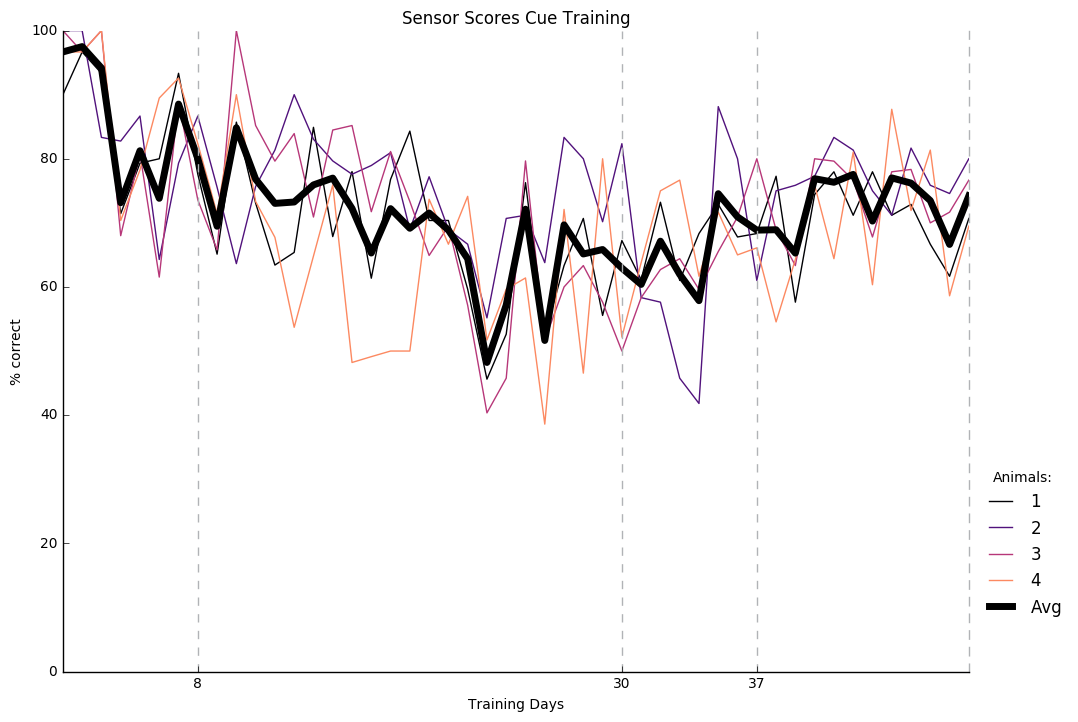

In [39]:
plotIt(sensorScores.ix[1:4,:], title = "Sensor Scores Cue Training", ylabel = "% correct", Phase = False, Norm = False, ylim = [0,100])

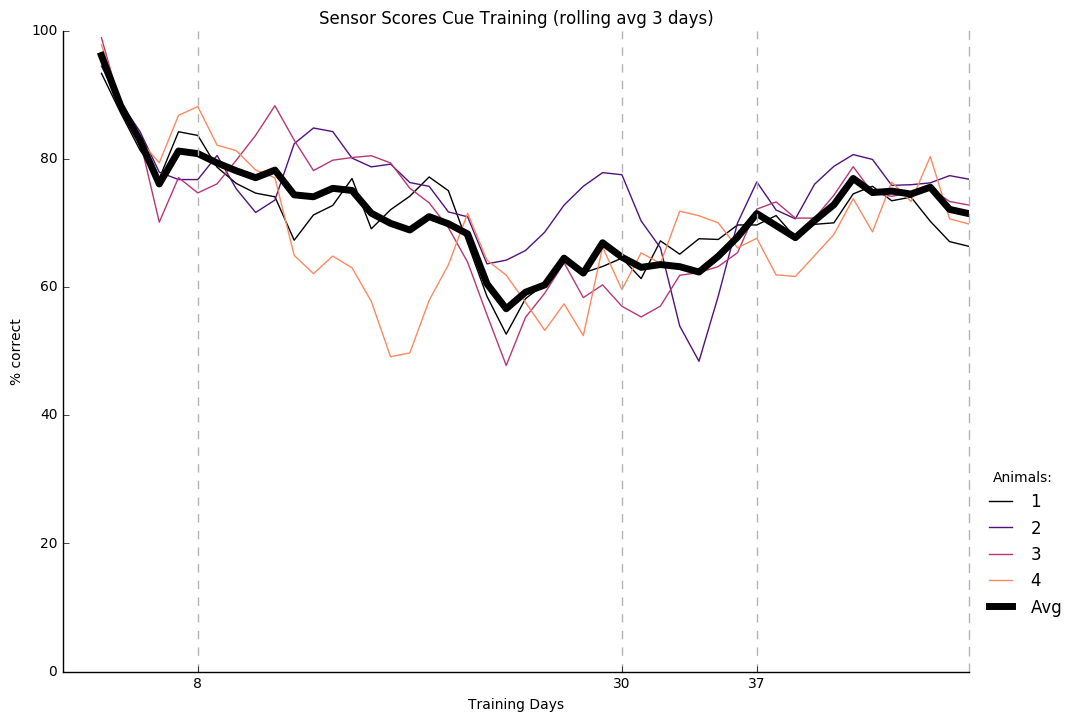

In [40]:
plotIt(sensorScores.ix[1:4,:].rolling(3).mean(), title = "Sensor Scores Cue Training (rolling avg 3 days)", ylabel = "% correct", Phase = False, Norm = False, ylim = [0,100])

### Full Task

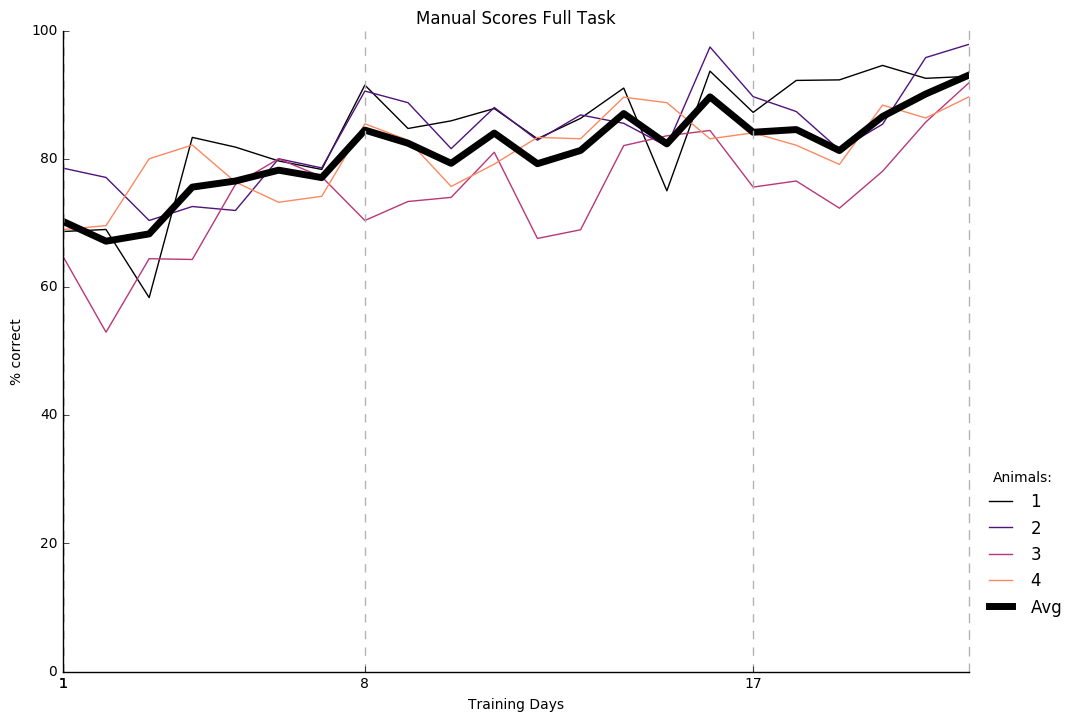

In [43]:
plotIt(manualScores.ix[5:7,:], title = "Manual Scores Full Task", ylabel = "% correct", Phase = False, Norm = False, ylim = [0,100])

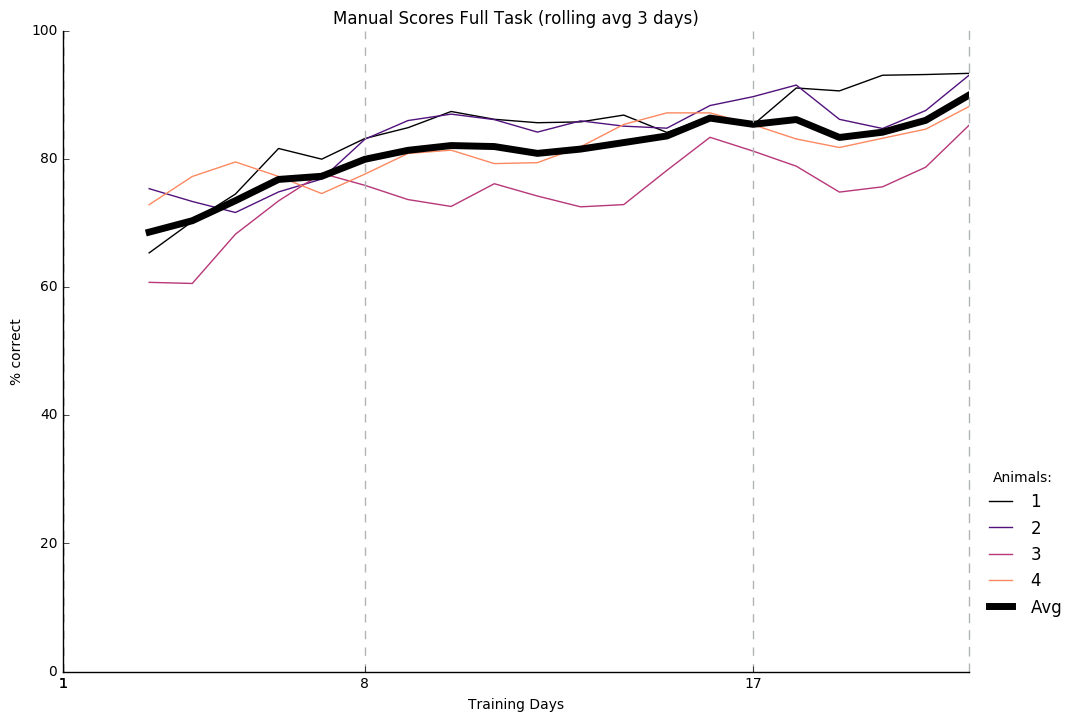

In [44]:
plotIt(manualScores.ix[5:7,:].rolling(3).mean(), title = "Manual Scores Full Task (rolling avg 3 days)", ylabel = "% correct", Phase = False, Norm = False, ylim = [0,100])

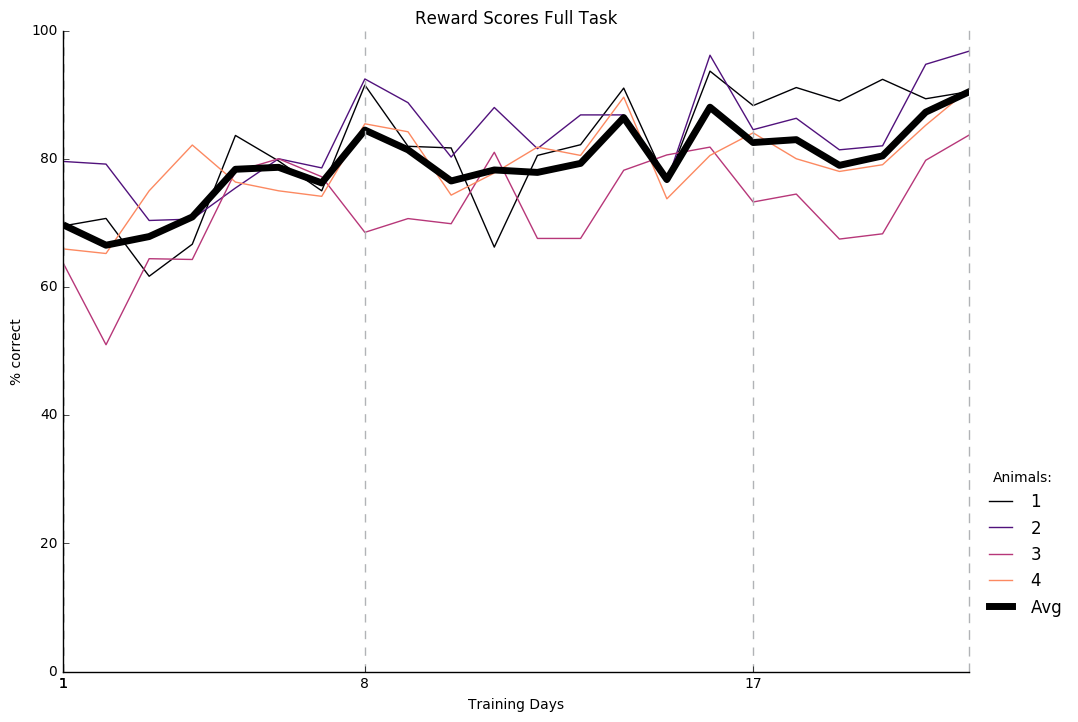

In [45]:
plotIt(rewardScores.ix[5:7,:], title = "Reward Scores Full Task", ylabel = "% correct", Phase = False, Norm = False, ylim = [0,100])

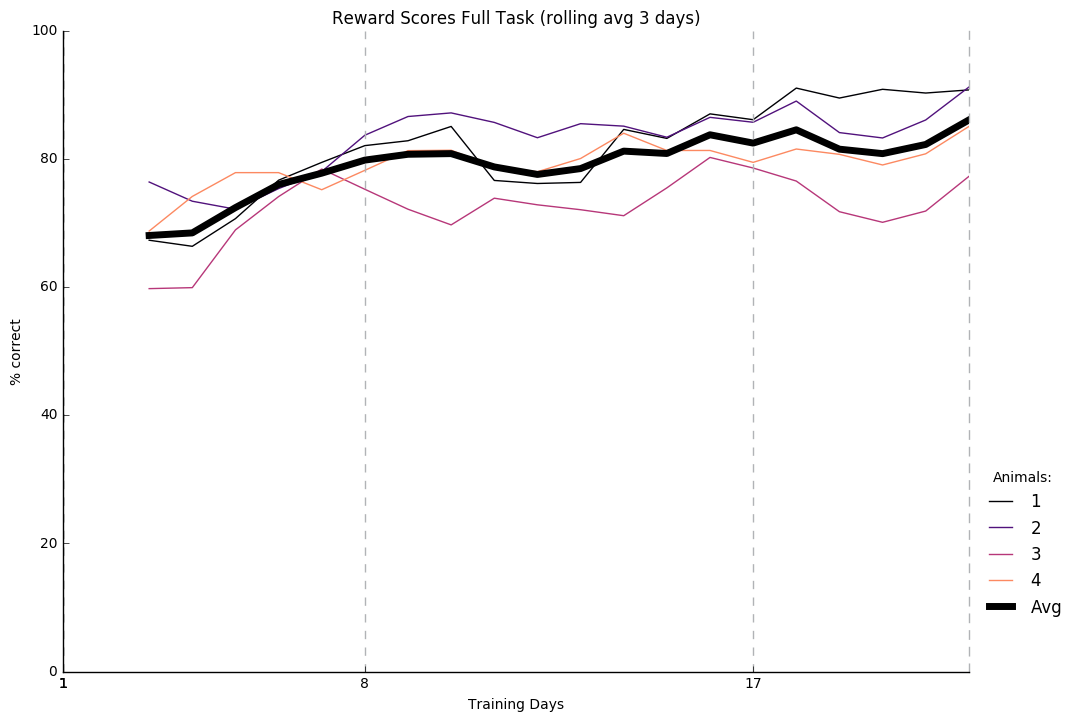

In [46]:
plotIt(rewardScores.ix[5:7,:].rolling(3).mean(), title = "Reward Scores Full Task (rolling avg 3 days)", ylabel = "% correct", Phase = False, Norm = False, ylim = [0,100])

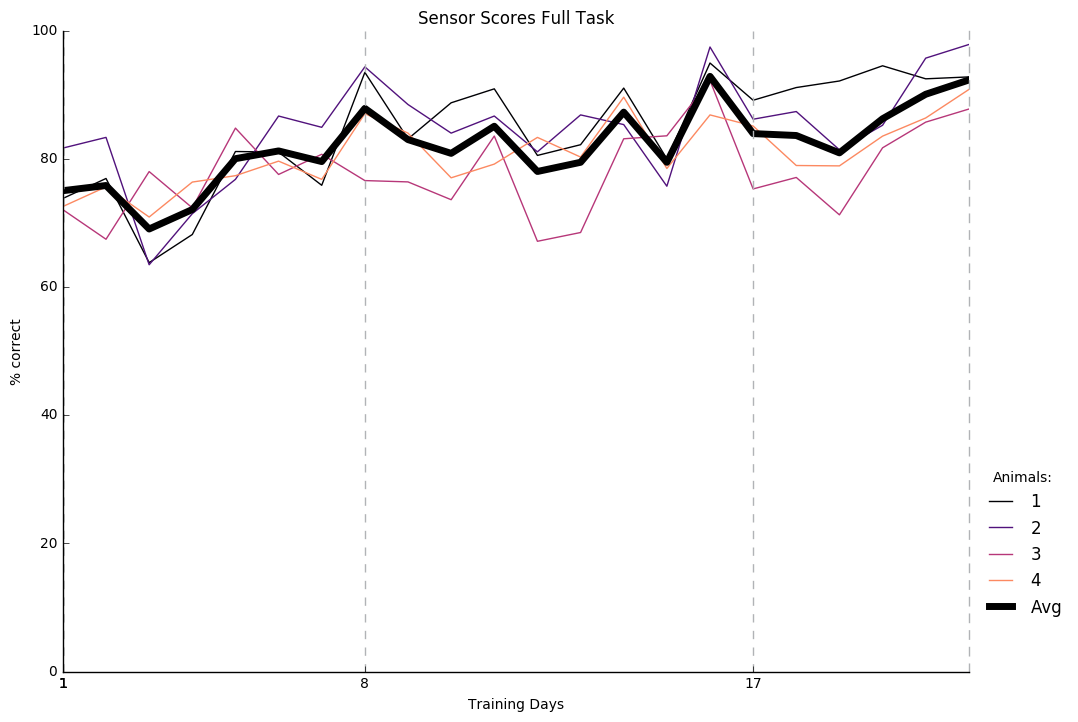

In [47]:
plotIt(sensorScores.ix[5:7,:], title = "Sensor Scores Full Task", ylabel = "% correct", Phase = False, Norm = False, ylim = [0,100])

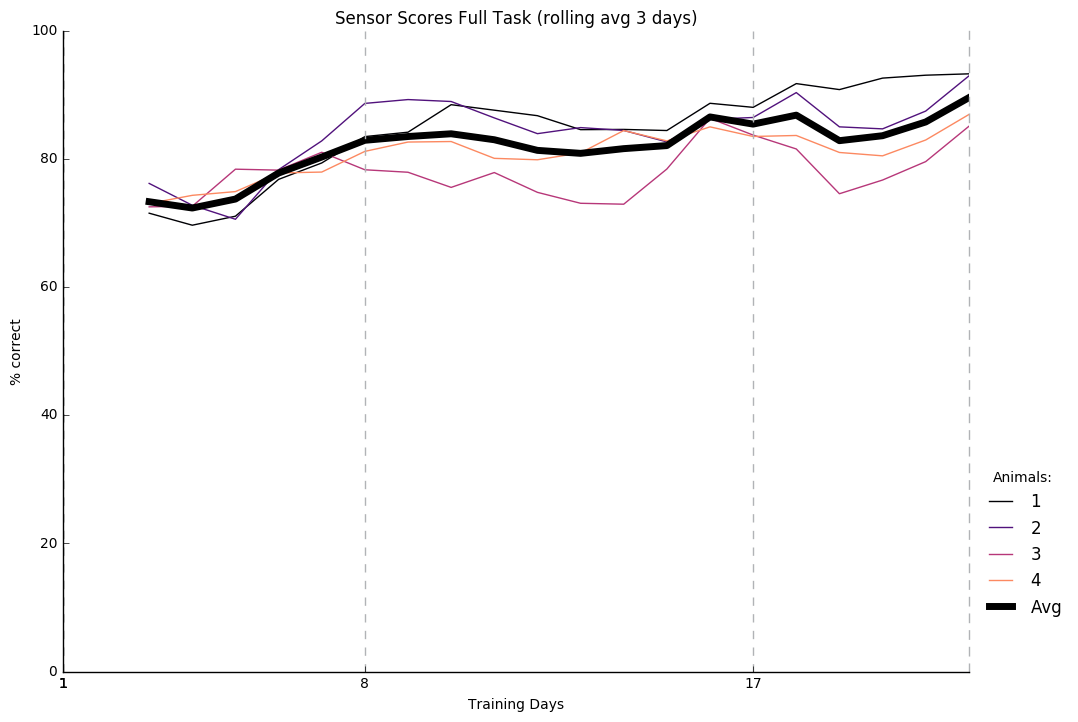

In [48]:
plotIt(sensorScores.ix[5:7,:].rolling(3).mean(), title = "Sensor Scores Full Task (rolling avg 3 days)", ylabel = "% correct", Phase = False, Norm = False, ylim = [0,100])

## Zoomed in comparison plots

In [5]:
manualScores = manualScoring(Mdat)
rewardScores = scorePerPhase(Adat,Mdat,  {'r': 2, 'p': 1})

choices,sides = preProcessChoices(Adat,Mdat)
correct, incorrect, nTotalTrials  = scoreChoicesUnfiltered(choices, sides)
sensorScores = calcScoresPerDay(correct, nTotalTrials)

In [51]:
def compareScoringMethodsScatterZoomed(method1,method2, method1name = "Reward Scores", method2name = "Manual Scores", phases = range(5,8)):    

    f, ax = plt.subplots()    
    #ax = axs.ravel()
    
    for phase in phases:
        
        ax.plot(method1.loc[phase].mean(),method2.loc[phase].mean(), marker='o', linestyle='', ms=6, label= "Phase " + str(phase))
 
        ax.legend(numpoints = 1, loc = 4, fontsize = 9)
        ax.set(xlim=(0,100), ylim=(0,100))
        ax.set_xlabel("% Correct " + method1name + " Scores")
        ax.set_ylabel("% Correct " + method2name  + " Scores")
        ax.set(adjustable='box-forced', aspect='equal')
        
        title = method1name + " Compared To " + method2name + " Scores"
        ax.set_title(title)
        
        ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

    plt.savefig(title + ".png",format = "png")
    plt.savefig(title + ".eps",format = "eps")

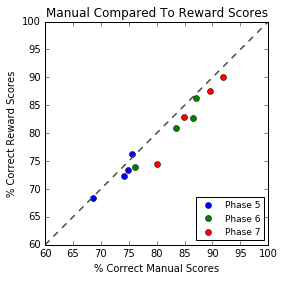

In [44]:
compareScoringMethodsScatterZoomed(manualScores,rewardScores.ix[5:7,:], method1name = "Manual", method2name = "Reward")

In [89]:
# animal 1
np.corrcoef(manualScores.ix[5:7,0],rewardScores.ix[5:7,0])

array([[1.       , 0.8169665],
       [0.8169665, 1.       ]])

In [90]:
# animal 2
np.corrcoef(manualScores.ix[5:7,1],rewardScores.ix[5:7,1])

array([[1.        , 0.96088453],
       [0.96088453, 1.        ]])

In [91]:
# animal 3
np.corrcoef(manualScores.ix[5:7,2],rewardScores.ix[5:7,2])

array([[1.        , 0.94772839],
       [0.94772839, 1.        ]])

In [92]:
# animal 4
np.corrcoef(manualScores.ix[5:7,3],rewardScores.ix[5:7,3])

array([[1.        , 0.82132039],
       [0.82132039, 1.        ]])

In [96]:
manualScores.ix[5,:].mean(axis=0)

1    74.156306
2    75.577949
3    68.518653
4    74.910458
dtype: float64

In [115]:
manualScores.ix[5,['1','2','4']]

1          2          4
Day                                 
1    68.649425  78.541667  68.949275
2    68.965517  77.083333  69.565217
3    58.333333  70.370370  80.000000
4    83.333333  72.549020  82.142857
5    81.818182  71.929825  76.363636
6    79.661017  80.000000  73.214286
7    78.333333  78.571429  74.137931

In [117]:
# pearson correlation phase 5
np.corrcoef(manualScores.ix[5,['1','2','4']].mean(axis=0),sensorScores.ix[5,['1','2','4']].mean(axis=0))

array([[1.        , 0.96807036],
       [0.96807036, 1.        ]])

In [118]:
# pearson correlation phase 6
np.corrcoef(manualScores.ix[6,:].mean(axis=0),sensorScores.ix[6,:].mean(axis=0))

array([[1.        , 0.98181856],
       [0.98181856, 1.        ]])

In [119]:
# pearson correlation phase 7
np.corrcoef(manualScores.ix[7,:].mean(axis=0),sensorScores.ix[7,:].mean(axis=0))

array([[1.        , 0.99632955],
       [0.99632955, 1.        ]])

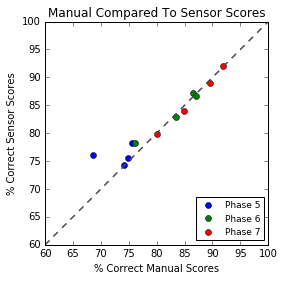

In [45]:
compareScoringMethodsScatterZoomed(manualScores,sensorScores.ix[5:7,:], method1name = "Manual", method2name = "Sensor")

In [103]:
sensorScores.ix[5,:].mean(axis=0)

Animal
1    74.390427
2    78.321164
3    76.124562
4    75.600994
dtype: float64

In [104]:
manualScores.ix[5,:].mean(axis=0)

1    74.156306
2    75.577949
3    68.518653
4    74.910458
dtype: float64

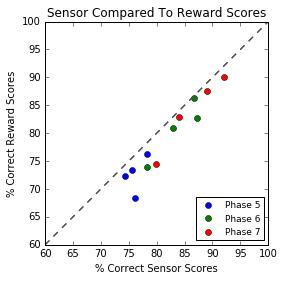

In [47]:
compareScoringMethodsScatterZoomed(sensorScores.ix[5:7,:],rewardScores.ix[5:7,:], method1name = "Sensor", method2name = "Reward")

In [105]:
# pearson correlation phase 5
np.corrcoef(manualScores.ix[5,:].mean(axis=0),sensorScores.ix[5,:].mean(axis=0))

array([[1.        , 0.16774096],
       [0.16774096, 1.        ]])

In [106]:
# pearson correlation phase 6
np.corrcoef(manualScores.ix[6,:].mean(axis=0),sensorScores.ix[6,:].mean(axis=0))

array([[1.        , 0.98181856],
       [0.98181856, 1.        ]])

In [107]:
# pearson correlation phase 7
np.corrcoef(manualScores.ix[6,:].mean(axis=0),sensorScores.ix[6,:].mean(axis=0))

array([[1.        , 0.98181856],
       [0.98181856, 1.        ]])

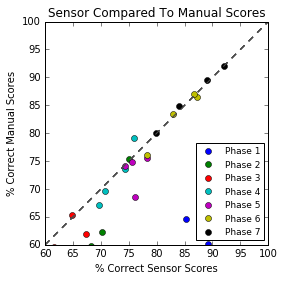

In [48]:
compareScoringMethodsScatterZoomed(sensorScores.ix[:,:],manualScores, method1name = "Sensor", method2name = "Manual", phases = range(1,8))

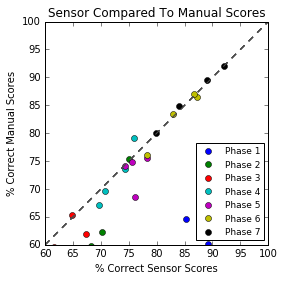

In [49]:
compareScoringMethodsScatterZoomed(sensorScores.ix[:,:],manualScores, method1name = "Sensor", method2name = "Manual", phases = range(1,8))

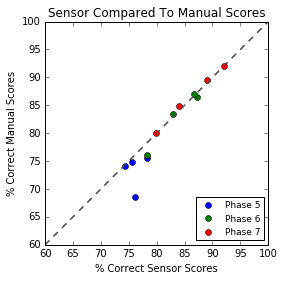

In [50]:
compareScoringMethodsScatterZoomed(sensorScores.ix[5:7,:],manualScores.ix[5:7,:], method1name = "Sensor", method2name = "Manual", phases = range(5,8))

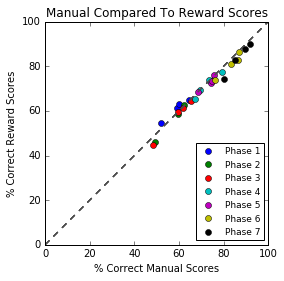

In [53]:
compareScoringMethodsScatterZoomed(manualScores,rewardScores.ix[:,:], method1name = "Manual", method2name = "Reward", phases = range(1,8))

In [72]:
sensorScores.ix[5:7,:]

Animal             1          2          3          4
Phase Day                                            
5     1    73.806366  81.666667  72.054264  72.550641
      2    76.923077  83.333333  67.441860  75.609756
      3    63.793103  63.461538  78.000000  70.909091
      4    68.181818  71.428571  72.340426  76.363636
      5    81.132075  76.785714  84.782609  77.358491
      6    81.034483  86.666667  77.551020  79.629630
      7    75.862069  84.905660  80.701754  76.785714
6     1    93.478261  94.339623  76.595745  87.037037
      2    83.098592  88.461538  76.388889  84.000000
      3    88.732394  84.000000  73.611111  77.027027
      4    90.909091  86.666667  83.544304  79.166667
      5    80.519481  81.081081  67.123288  83.333333
      6    82.191781  86.842105  68.493151  80.263158
      7    91.025641  85.333333  83.116883  89.610390
      8    80.000000  75.714286  83.582090  78.481013
      9    94.936709  97.435897  92.207792  86.842105
7     1    89.130435  86.170213  75.294118  85.106383
      2    91.111111  87.368421  77.083333  78.947368
      3    92.134831  81.395349  71.250000  78.888889
      4    94.505495  85.227273  81.707317  83.529412
      5    92.473118  95.698925  85.714286  86.363636
      6    92.771084  97.826087  87.755102  90.804598

In [80]:
# animal 1
ks_2samp(sensorScores.ix[5:7,'4'],manualScores.ix[5:7,'4'])

Ks_2sampResult(statistic=0.18181818181818182, pvalue=0.8209644313374204)

In [74]:
# animal 2
ks_2samp(sensorScores.ix[5:7,1],manualScores.ix[5:7,1])

Ks_2sampResult(statistic=0.18181818181818182, pvalue=0.8209644313374204)

In [75]:
# animal 3
ks_2samp(sensorScores.ix[5:7,2],manualScores.ix[5:7,2])

Ks_2sampResult(statistic=0.18181818181818182, pvalue=0.8209644313374204)

In [82]:
manualScores.ix[5:7,0]

Phase  Day
5      1      68.649425
       2      68.965517
       3      58.333333
       4      83.333333
       5      81.818182
       6      79.661017
       7      78.333333
6      1      91.489362
       2      84.722222
       3      85.915493
       4      87.837838
       5      83.116883
       6      86.301370
       7      91.025641
       8      75.000000
       9      93.670886
7      1      87.234043
       2      92.222222
       3      92.307692
       4      94.565217
       5      92.553191
       6      92.857143
Name: 1, dtype: float64

In [76]:
sensorScores.ix[5:7,0]

Phase  Day
5      1      73.806366
       2      76.923077
       3      63.793103
       4      68.181818
       5      81.132075
       6      81.034483
       7      75.862069
6      1      93.478261
       2      83.098592
       3      88.732394
       4      90.909091
       5      80.519481
       6      82.191781
       7      91.025641
       8      80.000000
       9      94.936709
7      1      89.130435
       2      91.111111
       3      92.134831
       4      94.505495
       5      92.473118
       6      92.771084
Name: 1, dtype: float64

In [77]:
sensorScores.ix[5:7,1]

Phase  Day
5      1      81.666667
       2      83.333333
       3      63.461538
       4      71.428571
       5      76.785714
       6      86.666667
       7      84.905660
6      1      94.339623
       2      88.461538
       3      84.000000
       4      86.666667
       5      81.081081
       6      86.842105
       7      85.333333
       8      75.714286
       9      97.435897
7      1      86.170213
       2      87.368421
       3      81.395349
       4      85.227273
       5      95.698925
       6      97.826087
Name: 2, dtype: float64

In [81]:
Mdat

1    2    3    4
Phase Day Block Trial                    
1     1   1     1      0.0  1.0  0.0  1.0
                2      1.0  1.0  0.0  0.0
                3      0.0  0.0  0.0  1.0
                4      0.0  1.0  1.0  1.0
                5      1.0  1.0  0.0  1.0
                6      0.0  1.0  1.0  1.0
                7      0.0  1.0  1.0  1.0
                8      0.0  0.0  0.0  0.0
                9      1.0  0.0  1.0  1.0
                10     0.0  0.0  0.0  0.0
          2     1      0.0  1.0  1.0  1.0
                2      1.0  0.0  0.0  1.0
                3      1.0  1.0  1.0  0.0
                4      1.0  1.0  1.0  1.0
                5      1.0  0.0  0.0  0.0
                6      1.0  1.0  1.0  1.0
                7      0.0  1.0  0.0  1.0
                8      1.0  0.0  1.0  1.0
                9      0.0  1.0  1.0  0.0
                10     0.0  0.0  0.0  0.0
          3     1      0.0  1.0  1.0  0.0
                2      1.0  1.0  1.0  0.0
                3      1.0  0.0  0.0  0.0
                4      0.0  1.0  1.0  1.0
                5      0.0  1.0  1.0  0.0
                6      1.0  1.0  1.0  1.0
                7      0.0  0.0  NaN  1.0
                8      1.0  1.0  0.0  1.0
                9      1.0  1.0  0.0  1.0
                10     0.0  1.0  1.0  1.0
...                    ...  ...  ...  ...
7     6   3     21     NaN  1.0  NaN  NaN
                22     NaN  1.0  NaN  1.0
                23     1.0  1.0  NaN  1.0
                24     1.0  1.0  NaN  1.0
                25     1.0  1.0  NaN  1.0
          4     1      NaN  NaN  1.0  NaN
                2      1.0  NaN  1.0  1.0
                3      NaN  NaN  1.0  NaN
                4      1.0  1.0  1.0  1.0
                5      0.0  1.0  NaN  1.0
                6      1.0  0.0  1.0  NaN
                7      1.0  1.0  NaN  0.0
                8      1.0  1.0  NaN  1.0
                9      1.0  1.0  NaN  1.0
                10     0.0  1.0  NaN  1.0
                11     1.0  1.0  NaN  1.0
                12     1.0  1.0  1.0  1.0
                13     1.0  1.0  1.0  1.0
                14     1.0  1.0  1.0  1.0
                15     NaN  1.0  1.0  0.0
                16     NaN  1.0  1.0  NaN
                17     1.0  1.0  NaN  NaN
                18     1.0  1.0  NaN  1.0
                19     1.0  1.0  1.0  0.0
                20     1.0  1.0  1.0  1.0
                21     1.0  1.0  NaN  1.0
                22     1.0  1.0  1.0  1.0
                23     1.0  NaN  1.0  1.0
                24     1.0  1.0  1.0  1.0
                25     1.0  1.0  1.0  0.0

[4365 rows x 4 columns]

### Fit line through scatters & calculate outlier

In [5]:
manualScores = manualScoring(Mdat)
rewardScores = scorePerPhase(Adat,Mdat,  {'r': 2, 'p': 1})

choices,sides = preProcessChoices(Adat,Mdat)
correct, incorrect, nTotalTrials  = scoreChoicesUnfiltered(choices, sides)
sensorScores = calcScoresPerDay(correct, nTotalTrials)

preprocessingFunctions.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[df == 2] = np.nan
/home/esther/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
preprocessingFunctions.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[mask] = np.nan


In [6]:
manualMean = manualScores.ix[5:7,:].groupby(level='Phase').mean()
rewardMean = rewardScores.ix[5:7,:].groupby(level='Phase').mean()
sensorMean = sensorScores.ix[5:7,:].groupby(level='Phase').mean()

/home/esther/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/esther/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/esther/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel packag

In [6]:
sensorMean

Animal          1          2          3          4
Phase                                             
5       74.390427  78.321164  76.124562  75.600994
6       87.210217  86.652726  78.295917  82.862303
7       92.021012  88.947711  79.800693  83.940048

In [26]:
sensorMean.unstack()

Animal  Phase
1       5        74.390427
        6        87.210217
        7        92.021012
2       5        78.321164
        6        86.652726
        7        88.947711
3       5        76.124562
        6        78.295917
        7        79.800693
4       5        75.600994
        6        82.862303
        7        83.940048
dtype: float64

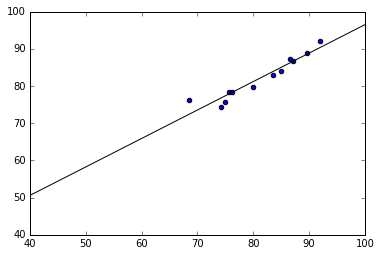

In [96]:
x = manualMean.unstack()
y = sensorMean.unstack()

model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 100, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.xlim([40,100])
plt.ylim([40,100])
plt.plot(xfit, yfit, 'k');

In [61]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [62]:
find_nearest(xfit,x[0])

741

In [64]:
yfit[741]

76.74011745590713

In [131]:
distances = np.empty(shape=len(y))

for i in range(0,len(y)):
    idx = find_nearest(xfit,x[i])
    distances[i] = abs(y[i]-yfit[idx])

error = np.std(distances) * 2

larger = distances > error

In [132]:
larger

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False])

In [252]:
np.where(larger == True)[0]

array([0, 6])

In [307]:
outliers = np.where(larger == True)[0]

In [310]:
for outlier in outliers:
    print(type(outlier))

<type 'numpy.int64'>
<type 'numpy.int64'>


In [254]:
6 in np.where(larger == True)[0]

True

In [126]:
distances

array([2.34969006, 0.9797768 , 1.65769038, 0.509559  , 0.03961159,
       0.42122572, 3.67039641, 0.02510226, 1.37844654, 1.67486737,
       0.9955559 , 1.06583434])

In [127]:
np.std(distances)

0.991571905110436

In [128]:
np.square(distances)

array([5.52104336e+00, 9.59962580e-01, 2.74793739e+00, 2.59650378e-01,
       1.56907808e-03, 1.77431105e-01, 1.34718098e+01, 6.30123326e-04,
       1.90011486e+00, 2.80518070e+00, 9.91131543e-01, 1.13600285e+00])

In [120]:
np.square([2,3])

array([4, 9])

In [99]:
sensorMean.loc[5]

Animal
1    74.390427
2    78.321164
3    76.124562
4    75.600994
Name: 5, dtype: float64

In [100]:
sensorMean

Animal          1          2          3          4
Phase                                             
5       74.390427  78.321164  76.124562  75.600994
6       87.210217  86.652726  78.295917  82.862303
7       92.021012  88.947711  79.800693  83.940048

In [164]:
sensorMean.unstack()

Animal  Phase
1       5        74.390427
        6        87.210217
        7        92.021012
2       5        78.321164
        6        86.652726
        7        88.947711
3       5        76.124562
        6        78.295917
        7        79.800693
4       5        75.600994
        6        82.862303
        7        83.940048
dtype: float64

In [168]:
sensorMean.unstack().index[0][1]

5

In [275]:

cmap = cm.get_cmap('magma', 20)    # PiYG

for i in range(cmap.N):
    rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
    print(matplotlib.colors.rgb2hex(rgb))

#000004
#07061c
#150e38
#29115a
#3f0f72
#56147d
#6a1c81
#802582
#942c80
#ab337c
#c03a76
#d6456c
#e85362
#f4695c
#fa815f
#fd9b6b
#feb47b
#fecd90
#fde5a7
#fcfdbf


In [31]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def scoringMethodsScatterWithFit(method1,method2, method1name = "Reward", method2name = "Manual", phaseStart = 5, phaseEnd = 7):    
    
    # take mean over all days within each phase
    method1Mean = method1.ix[phaseStart:phaseEnd,:].groupby(level='Phase').mean()
    method2Mean = method2.ix[phaseStart:phaseEnd,:].groupby(level='Phase').mean()
    
    ### Fitting ###
    # calculate regression line
    x = method1Mean.unstack()
    y = method2Mean.unstack()
    
    model = LinearRegression(fit_intercept=True)
    
    # initial fit
    model.fit(x[:, np.newaxis], y)

    xfit = np.linspace(0, 100, 1000)
    yfit = model.predict(xfit[:, np.newaxis])
    
    # calculate distances data points from fitted line
    distances = np.empty(shape=len(y))

    for i in range(0,len(y)):
        idx = find_nearest(xfit,x[i])
        distances[i] = abs(yfit[idx]-y[i])
    
    # calculate twice the standard deviation
    error = np.std(distances) * 3
    
    # find outliers
    largerThanError = distances > error
    outlierIndexes = np.where(largerThanError == True)[0]
    
    # Refit without outliers
    x2 = np.setdiff1d(x, x[outlierIndexes])
    y2 = np.setdiff1d(y, y[outlierIndexes])
    
#     model2 = LinearRegression(fit_intercept=True)
    model.fit(x2[:, np.newaxis], y2)

    xfit2 = np.linspace(0, 100, 1000)
    yfit2 = model.predict(xfit2[:, np.newaxis])
    
    
    # get model details to plot in textbox
    coef = model.coef_
    intercept = model.intercept_
    # should be in format y=coef*x + intercept (eg: y=0.89x+9.32 )
    r2 = model.score(x2[:, np.newaxis],y2)
    
    ### Plotting ###
    # variables for plotting
#     phaseColors = pd.Series({'5': '#fa815f', '6': '#c03a76', '7': '#51127c'})
#     phaseColors = pd.Series({'5': '#c4d7cd', '6': '#758f8c', '7': '#2b484c'})
    phaseColors = pd.Series({
        '1': '#fecd90',
        '2': '#fd9b6b',
        '3': '#f4695c',
        '4': '#e85362',
        '5': '#d6456c', 
        '6': '#ab337c', 
        '7': '#29115a'})
    
    # create figure and handle
    f, ax = plt.subplots()   

    for i in range(0,len(y)):
        fill_style = 'full'
        if i in outlierIndexes:
            fill_style = 'none'
        
        phase = method1Mean.unstack().index[i][1]
        ax.plot(x.iloc[i],
                y.iloc[i], 
                marker='o', 
                color= phaseColors.loc[str(phase)],
                fillstyle = fill_style, 
                linestyle='', 
                ms=6,
                label= "Phase " + str(phase))
    
    if phaseStart > 4:
        xmin = 60
    else:
        xmin = 40
    
    
    ax.set(xlim=(xmin,100), ylim=(xmin,100))
    ax.set_xlabel("% Correct " + method1name + " Scores")
    ax.set_ylabel("% Correct " + method2name  + " Scores")
    ax.set(adjustable='box-forced', aspect='equal')  
    title = method1name + " Compared To " + method2name + " Scores"
    ax.set_title(title)
    
    #plot diagonal line
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".4")
    
    # plot regression line
    ax.plot(xfit2, yfit2, color='#27231a')
    
    #get existing legend item handles and labels
    handles,labels=ax.get_legend_handles_labels()
    #make an index for later
    indx=np.arange(len(labels)) 
    #set up a filter (empty for now)
    nonOutlierFilter=np.array([]) 
    outlierFilter=np.array([]) 
    #find unique labels
    unique_labels=set(labels)
    
    #loop through unique labels
    for ul in unique_labels: 
        # only include labels that do not represent outlier data points
        nonOutlierLabels = np.setdiff1d(indx[np.array(labels)==ul], outlierIndexes)
        outlierLabels = np.intersect1d(indx[np.array(labels)==ul], outlierIndexes)
        #find the first non-outlier instance of this label and add its index to the filter
        nonOutlierFilter = np.append(nonOutlierFilter,[nonOutlierLabels[0]]) 
        # add outliers to outlierFilter, if there are any
        if len(outlierLabels) > 0:
            outlierFilter = np.append(outlierFilter,[outlierLabels[0]])

    # filter out legend items to keep only the first instance of each repeated label
    handlesNonOutliers=[handles[int(f)] for f in nonOutlierFilter]
    labelsNonOutliers=[labels[int(f)] for f in nonOutlierFilter]

#   sort according to phase
    handles_all =[x for _,x in sorted(zip(labelsNonOutliers,handlesNonOutliers))]
    labels_all  = sorted(labelsNonOutliers, key=lambda x: int(x[-1]))
    
    # add label for outlier if present
    if len(outlierFilter) > 0:
        outlierFilter = [outlierFilter[0]]
        handleOutlier = [handles[int(f)] for f in outlierFilter]
        handles_all   = np.append(handles_all,handleOutlier)
        labels_all    = np.append(labels_all,['Outlier'])
        
    # create legend 
    ax.legend(handles_all,labels_all,numpoints = 1, loc = 4, fontsize = 9)
    
#     # save figure
#     plt.savefig(title + ".png",format = "png")
#     plt.savefig(title + ".eps",format = "eps")
    return model, coef,intercept,r2

        

    

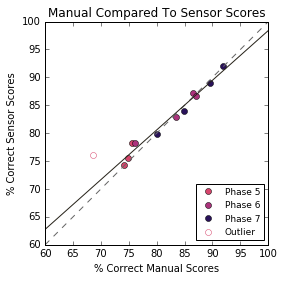

In [229]:
outliers,model,x,y = scoringMethodsScatterWithFit(manualScores,sensorScores, method1name = "Manual", method2name = "Sensor")

In [225]:
model.coef_

array([0.8907787])

In [226]:
model.intercept_

9.315728694596785

In [ ]:
y=0.89x+9.32

In [230]:
model.score(x,y)

0.9743406126416673

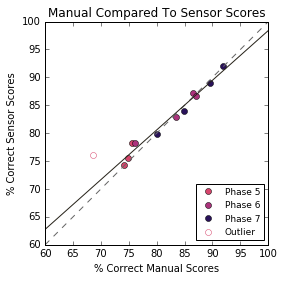

In [114]:
scoringMethodsScatterWithFit(manualScores,sensorScores, method1name = "Manual", method2name = "Sensor")

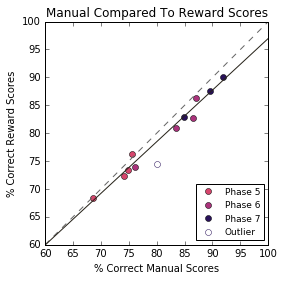

In [115]:
scoringMethodsScatterWithFit(manualScores,rewardScores, method1name = "Manual", method2name = "Reward")

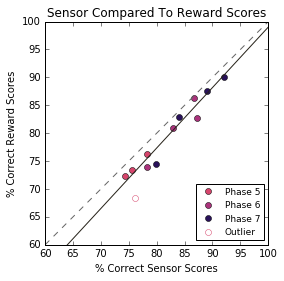

In [116]:
scoringMethodsScatterWithFit(sensorScores,rewardScores, method1name = "Sensor", method2name = "Reward")

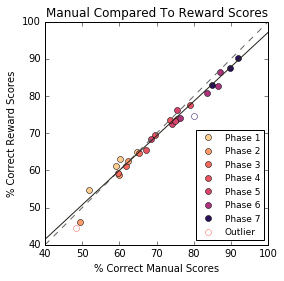

In [118]:
scoringMethodsScatterWithFit(manualScores,rewardScores, method1name = "Manual", method2name = "Reward", phaseStart = 1, phaseEnd = 7)

(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 array([0.70443485]),
 25.636709997047568,
 0.9725848328147204)

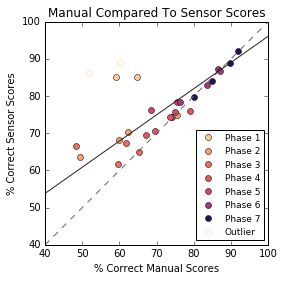

In [32]:
scoringMethodsScatterWithFit(manualScores,sensorScores, method1name = "Manual", method2name = "Sensor", phaseStart = 1, phaseEnd = 7)

### Correlation Coefficients

#### Manual vs. Reward Based Scoring

In [ ]:
# pearson correlation phase 5
np.corrcoef(manualScores.ix[5,['1','2','4']].mean(axis=0),sensorScores.ix[5,['1','2','4']].mean(axis=0))

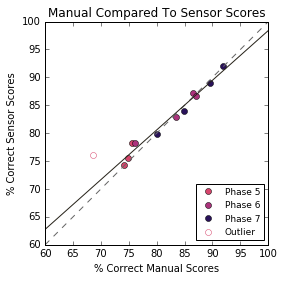

In [129]:
outlierIndexes_mr,manualMeans,sensorMeans = scoringMethodsScatterWithFit(manualScores,sensorScores, method1name = "Manual", method2name = "Sensor")

In [133]:
manualMeans.unstack()[outlierIndexes_mr]

   Phase
3  5        68.518653
dtype: float64

In [206]:
manual = manualMeans.unstack()
sensor = sensorMeans.unstack()

manual = manual[~manual.isin(manual[outlierIndexes_mr])]
sensor = sensor[~sensor.isin(sensor[outlierIndexes_mr])]

phases = manual.index.get_level_values('Phase').unique()
# corrCoefs = pd.DataFrame(columns = phases)
test =[]

for phase in phases:
    manualAvg = manual.loc[(manual.index.get_level_values('Phase') == phase)].mean(axis=0)
    sensorAvg = sensor.loc[(sensor.index.get_level_values('Phase') == phase)].mean(axis=0)
    print type(manualAvg)
    print sensorAvg
    print np.corrcoef(manualAvg,sensorAvg)
    print('\n')
#     corrCoefs.loc[0,phase] = np.corrcoef(manualAvg,sensorAvg)


# numpy style - loses indexes
# manualMeansNonOutlier = np.setdiff1d(manual, manual[outlierIndexes_mr])
# sensorMeansNonOutlier = np.setdiff1d(sensor, sensor[outlierIndexes_mr])

# np.corrcoef(manualScores.ix[5,:].mean(),sensorScores.ix[5,:].mean())

<type 'float'>
76.1041953157
[[nan nan]
 [nan nan]]


<type 'float'>
83.7552905756
[[nan nan]
 [nan nan]]


<type 'float'>
86.1773659781
[[nan nan]
 [nan nan]]




In [204]:
manual.loc[(manual.index.get_level_values('Phase') == phase)].mean()

86.62028155100694

In [181]:
manual

   Phase
1  5        74.156306
   6        86.564411
   7        91.956585
2  5        75.577949
   6        87.059832
   7        89.581114
3  6        76.136045
   7        80.000161
4  5        74.910458
   6        83.457679
   7        84.943266
dtype: float64

In [187]:
manual.index.get_level_values('Phase').unique()

Int64Index([5, 6, 7], dtype='int64', name=u'Phase')

In [184]:
phase5 = manual.loc[(manual.index.get_level_values('Phase') == 5)]

In [188]:
phase5.mean()

74.88157082933337

In [189]:
phases = manual.index.get_level_values('Phase').unique()
corrCoefs = pd.DataFrame(columns = phases)

In [190]:
corrCoefs

Empty DataFrame
Columns: [5, 6, 7]
Index: []

In [198]:
corrCoefs.loc[0,5] = 4

In [199]:
corrCoefs

Phase    5    6    7    5
5      4.0    4    4  4.0
0      4.0  NaN  NaN  NaN

In [ ]:
np.corrcoef(manualScores.ix[5,['1','2','4']].mean(axis=0),sensorScores.ix[5,['1','2','4']].mean(axis=0))

In [207]:
manualScores.ix[5,['1','2','4']].mean(axis=0)

1    74.156306
2    75.577949
4    74.910458
dtype: float64

In [209]:
manualScores.ix[5,['1','2','4']]

1          2          4
Day                                 
1    68.649425  78.541667  68.949275
2    68.965517  77.083333  69.565217
3    58.333333  70.370370  80.000000
4    83.333333  72.549020  82.142857
5    81.818182  71.929825  76.363636
6    79.661017  80.000000  73.214286
7    78.333333  78.571429  74.137931

In [213]:
manualMeans.unstack()[outlierIndexes_mr].index.get_level_values()

Index([u'1', u'2', u'3', u'4'], dtype='object')

In [218]:
np.where(manualMeans,manualMeans.unstack()[outlierIndexes_mr])

ValueError: either both or neither of x and y should be given

MultiIndex(levels=[[u'1', u'2', u'3', u'4'], [5, 6, 7]],
           labels=[[2], [0]],
           names=[None, u'Phase'])

In [219]:
manualScores

1          2          3          4
Phase Day                                            
1     1    46.666667  66.666667  55.172414  63.333333
      2    30.000000  53.333333  40.000000  40.000000
      3    46.666667  60.000000  46.666667  66.666667
      4    42.857143  72.413793  53.846154  51.851852
      5    56.666667  56.666667  77.777778  69.565217
      6    63.333333  57.142857  51.851852  42.857143
      7    76.666667  86.206897  88.888889  86.206897
2     1    70.000000  85.000000  58.333333  58.333333
      2    63.333333  75.000000  56.666667  46.666667
      3    45.000000  76.666667  46.666667  50.000000
      4    53.333333  73.333333  56.666667  53.333333
      5    48.333333  81.666667  75.000000  48.333333
      6    55.000000  90.000000  80.000000  48.333333
      7    77.966102  81.666667  71.666667  60.000000
      8    61.666667  85.000000  85.000000  71.666667
      9    65.000000  86.666667  78.333333  45.000000
      10   50.000000  83.333333  48.333333  43.333333
      11   76.666667  76.666667  76.271186  36.666667
      12   73.333333  70.000000  75.000000  31.666667
      13   68.333333  76.666667  60.000000  53.333333
      14   68.333333  63.333333  66.666667  46.666667
      15   51.666667  63.333333  53.333333  51.666667
      16   40.000000  53.333333  33.333333  38.333333
      17   43.333333  63.333333  40.000000  48.333333
      18   73.333333  71.666667  78.333333  50.000000
      19   50.000000  61.666667  51.666667  38.333333
      20   63.333333  88.333333  60.000000  66.666667
      21   65.000000  81.666667  63.333333  38.333333
      22   51.666667  71.666667  55.000000  63.333333
3     1    63.333333  80.392157  46.666667  43.333333
...              ...        ...        ...        ...
4     5    77.966102  83.333333  78.181818  64.406780
      6    70.000000  81.355932  76.666667  79.661017
      7    76.271186  78.333333  66.666667  61.666667
      8    71.666667  75.000000  76.666667  86.206897
      9    71.666667  83.333333  80.000000  67.796610
      10   64.406780  77.966102  70.000000  81.355932
      11   61.666667  85.000000  71.666667  58.333333
      12   68.333333  80.000000  76.666667  68.333333
5     1    68.649425  78.541667  64.803922  68.949275
      2    68.965517  77.083333  52.941176  69.565217
      3    58.333333  70.370370  64.406780  80.000000
      4    83.333333  72.549020  64.285714  82.142857
      5    81.818182  71.929825  76.000000  76.363636
      6    79.661017  80.000000  80.000000  73.214286
      7    78.333333  78.571429  77.192982  74.137931
6     1    91.489362  90.566038  70.370370  85.454545
      2    84.722222  88.750000  73.333333  82.894737
      3    85.915493  81.578947  73.972603  75.675676
      4    87.837838  88.000000  81.012658  79.166667
      5    83.116883  82.894737  67.567568  83.333333
      6    86.301370  86.842105  68.918919  83.116883
      7    91.025641  85.526316  82.051282  89.610390
      8    75.000000  81.944444  83.582090  88.750000
      9    93.670886  97.435897  84.415584  83.116883
7     1    87.234043  89.690722  75.581395  84.042553
      2    92.222222  87.368421  76.530612  82.105263
      3    92.307692  81.395349  72.289157  79.120879
      4    94.565217  85.393258  78.048780  88.372093
      5    92.553191  95.789474  85.714286  86.363636
      6    92.857143  97.849462  91.836735  89.655172

[70 rows x 4 columns]

### r2 values

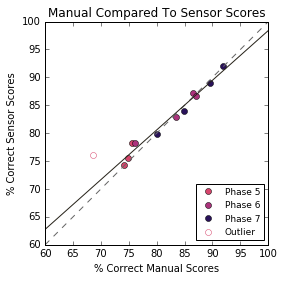

In [11]:
model, coef,intercept,r2 = scoringMethodsScatterWithFit(manualScores,sensorScores, method1name = "Manual", method2name = "Sensor")

In [16]:
print("Manual Versus Sensor Scores")
print("___________________________")
print("")
print("coefficient: %f" %coef)
print("intercept: %f" %intercept)
print("r2: %f" %r2)

Manual Versus Sensor Scores
___________________________

coefficient: 0.890779
intercept: 9.315729
r2: 0.974341


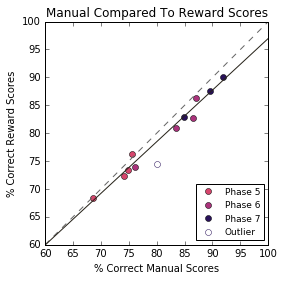

In [17]:
model, coef,intercept,r2 = scoringMethodsScatterWithFit(manualScores,rewardScores, method1name = "Manual", method2name = "Reward")

In [19]:
print("Manual Versus Reward Scores")
print("___________________________")
print("")
print("coefficient: %f" %coef)
print("intercept: %f" %intercept)
print("r2: %f" %r2)

Manual Versus Reward Scores
___________________________

coefficient: 0.925899
intercept: 4.395400
r2: 0.982831


#### All Phases

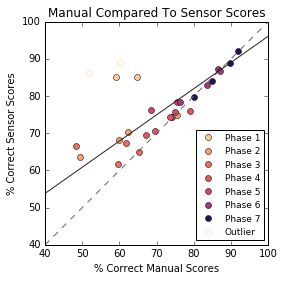

In [33]:
model, coef,intercept,r2 = scoringMethodsScatterWithFit(manualScores,sensorScores, method1name = "Manual", method2name = "Sensor", phaseStart = 1, phaseEnd = 7)

In [34]:
print("Manual Versus Sensor Scores")
print("___________________________")
print("")
print("coefficient: %f" %coef)
print("intercept: %f" %intercept)
print("r2: %f" %r2)

Manual Versus Sensor Scores
___________________________

coefficient: 0.704435
intercept: 25.636710
r2: 0.972585


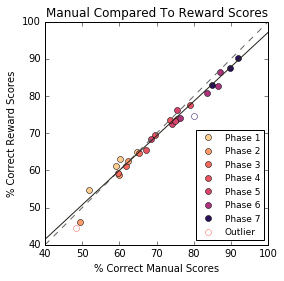

In [35]:
model, coef,intercept,r2 = scoringMethodsScatterWithFit(manualScores,rewardScores, method1name = "Manual", method2name = "Reward", phaseStart = 1, phaseEnd = 7)

In [36]:
print("Manual Versus Reward Scores")
print("___________________________")
print("")
print("coefficient: %f" %coef)
print("intercept: %f" %intercept)
print("r2: %f" %r2)

Manual Versus Reward Scores
___________________________

coefficient: 0.927609
intercept: 4.381800
r2: 0.987723
